# Business Case:- 
* This dataset is about the direct phone call marketing campaigns, which aim to promote 
term deposits among existing customers, by a Portuguese banking institution from May 
2008 to November 2010. 
* Create a predictive model which will help the bank marketing team to know 
which customer will buy the product. 

## Domain:- 
* Finance/Banking Industry

## Domain Analysis

In [42]:
import pandas as pd # use for data analysis,data manipalution
import numpy as np # use for numerical function
import matplotlib.pyplot as plt # use for data visulization
import seaborn as sns # # use for data visulization
from ydata_profiling import ProfileReport # It is use for automaticaly data visulization
import warnings # use for ignore the warinig
warnings.filterwarnings("ignore")

In [43]:
data = pd.read_csv("bank-full.csv") # load the data set
data

,"age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y"
0,"58,management,married,tertiary,no,2143,yes,no,..."
1,"44,technician,single,secondary,no,29,yes,no,un..."
2,"33,entrepreneur,married,secondary,no,2,yes,yes..."
3,"47,blue-collar,married,unknown,no,1506,yes,no,..."
4,"33,unknown,single,unknown,no,1,no,no,unknown,5..."
...,...
45206,"51,technician,married,tertiary,no,825,no,no,ce..."
45207,"71,retired,divorced,primary,no,1729,no,no,cell..."
45208,"72,retired,married,secondary,no,5715,no,no,cel..."
45209,"57,blue-collar,married,secondary,no,668,no,no,..."


In [44]:
# Step 1: Read the data (no header, because the first row contains column names as one string)
df = pd.read_csv('bank-full.csv', header=None)

# Step 2: Get the column names from the first row
column_names = df.iloc[0, 0].split(',')

# Step 3: Drop the first row which is now used for column names
df = df.drop(0, axis=0)

# Step 4: Split the data in the first column into separate columns
df_split = df[0].str.split(',', expand=True)

# Step 5: Assign the column names from the first row
df_split.columns = column_names

# Step 6: Check the result
print(df_split.head())

  age           job  marital  education default balance housing loan  contact  \
1  58    management  married   tertiary      no    2143     yes   no  unknown   
2  44    technician   single  secondary      no      29     yes   no  unknown   
3  33  entrepreneur  married  secondary      no       2     yes  yes  unknown   
4  47   blue-collar  married    unknown      no    1506     yes   no  unknown   
5  33       unknown   single    unknown      no       1      no   no  unknown   

  day month duration campaign pdays previous poutcome   y  
1   5   may      261        1    -1        0  unknown  no  
2   5   may      151        1    -1        0  unknown  no  
3   5   may       76        1    -1        0  unknown  no  
4   5   may       92        1    -1        0  unknown  no  
5   5   may      198        1    -1        0  unknown  no  


In [45]:
df[0]

1        58,management,married,tertiary,no,2143,yes,no,...
2        44,technician,single,secondary,no,29,yes,no,un...
3        33,entrepreneur,married,secondary,no,2,yes,yes...
4        47,blue-collar,married,unknown,no,1506,yes,no,...
5        33,unknown,single,unknown,no,1,no,no,unknown,5...
                               ...                        
45207    51,technician,married,tertiary,no,825,no,no,ce...
45208    71,retired,divorced,primary,no,1729,no,no,cell...
45209    72,retired,married,secondary,no,5715,no,no,cel...
45210    57,blue-collar,married,secondary,no,668,no,no,...
45211    37,entrepreneur,married,secondary,no,2971,no,n...
Name: 0, Length: 45211, dtype: object

In [46]:
df.iloc[0,0]

'58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no'

In [47]:
df_split

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [48]:
df_split.info() # check data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 1 to 45211
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  object
 12  campaign   45211 non-null  object
 13  pdays      45211 non-null  object
 14  previous   45211 non-null  object
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: object(17)
memory usage: 5.9+ MB


In [49]:
df_split.job.unique() # check the unique data

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [50]:
# Step 1: Read the data (no header, because the first row contains column names as one string)
df1 = pd.read_csv('bank.csv', header=None)

# Step 2: Get the column names from the first row
column_names = df1.iloc[0, 0].split(';')

# Step 3: Drop the first row which is now used for column names
df1 = df1.drop(0, axis=0)

# Step 4: Split the data in the first column into separate columns
df_split1 = df1[0].str.split(';', expand=True)

# Step 5: Assign the column names from the first row
df_split1.columns = column_names

# Step 6: Remove quotes from both column names and data in the dataframe
df_split1.columns = df_split1.columns.str.replace('"', '')  # Remove quotes from column names
df_split1 = df_split1.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)  # Remove quotes from data

# Step 7: Check the result
print(df_split1.head())

  age          job  marital  education default balance housing loan   contact  \
1  30   unemployed  married    primary      no    1787      no   no  cellular   
2  33     services  married  secondary      no    4789     yes  yes  cellular   
3  35   management   single   tertiary      no    1350     yes   no  cellular   
4  30   management  married   tertiary      no    1476     yes  yes   unknown   
5  59  blue-collar  married  secondary      no       0     yes   no   unknown   

  day month duration campaign pdays previous poutcome   y  
1  19   oct       79        1    -1        0  unknown  no  
2  11   may      220        1   339        4  failure  no  
3  16   apr      185        1   330        1  failure  no  
4   3   jun      199        4    -1        0  unknown  no  
5   5   may      226        1    -1        0  unknown  no  


In [51]:
df_split1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [52]:
df_split1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


In [53]:
data1 = pd.concat([df_split,df_split1],ignore_index=True) # concate the two table
data1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [54]:
b1 = pd.read_csv("bank-additional-full.csv") # load the dataset
b1

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."


In [55]:
# Step 1: Read the data (no header, because the first row contains column names as one string)
df3 = pd.read_csv('bank-additional-full.csv', header=None)

# Step 2: Get the column names from the first row
column_names = df3.iloc[0, 0].split(';')

# Step 3: Drop the first row which is now used for column names
df3 = df3.drop(0, axis=0)

# Step 4: Split the data in the first column into separate columns
df_split3 = df3[0].str.split(';', expand=True)

# Step 5: Assign the column names from the first row
df_split3.columns = column_names

# Step 6: Remove quotes from both column names and data in the dataframe
df_split3.columns = df_split3.columns.str.replace('"', '')  # Remove quotes from column names
df_split3 = df_split3.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)  # Remove quotes from data

# Step 7: Check the result
print(df_split3.head())

  age        job  marital    education  default housing loan    contact month  \
1  56  housemaid  married     basic.4y       no      no   no  telephone   may   
2  57   services  married  high.school  unknown      no   no  telephone   may   
3  37   services  married  high.school       no     yes   no  telephone   may   
4  40     admin.  married     basic.6y       no      no   no  telephone   may   
5  56   services  married  high.school       no      no  yes  telephone   may   

  day_of_week duration campaign pdays previous     poutcome emp.var.rate  \
1         mon      261        1   999        0  nonexistent          1.1   
2         mon      149        1   999        0  nonexistent          1.1   
3         mon      226        1   999        0  nonexistent          1.1   
4         mon      151        1   999        0  nonexistent          1.1   
5         mon      307        1   999        0  nonexistent          1.1   

  cons.price.idx cons.conf.idx euribor3m nr.employed   y

In [56]:
df_split3

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41185,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41187,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [57]:
b2 = pd.read_csv("bank-additional.csv") # load the dataset
b2

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"30;""blue-collar"";""married"";""basic.9y"";""no"";""ye..."
1,"39;""services"";""single"";""high.school"";""no"";""no""..."
2,"25;""services"";""married"";""high.school"";""no"";""ye..."
3,"38;""services"";""married"";""basic.9y"";""no"";""unkno..."
4,"47;""admin."";""married"";""university.degree"";""no""..."
...,...
4114,"30;""admin."";""married"";""basic.6y"";""no"";""yes"";""y..."
4115,"39;""admin."";""married"";""high.school"";""no"";""yes""..."
4116,"27;""student"";""single"";""high.school"";""no"";""no"";..."
4117,"58;""admin."";""married"";""high.school"";""no"";""no"";..."


In [58]:
# Step 1: Read the data (no header, because the first row contains column names as one string)
df4 = pd.read_csv('bank-additional.csv', header=None)

# Step 2: Get the column names from the first row
column_names = df4.iloc[0, 0].split(';')

# Step 3: Drop the first row which is now used for column names
df4 = df4.drop(0, axis=0)

# Step 4: Split the data in the first column into separate columns
df_split4 = df4[0].str.split(';', expand=True)

# Step 5: Assign the column names from the first row
df_split4.columns = column_names

# Step 6: Remove quotes from both column names and data in the dataframe
df_split4.columns = df_split4.columns.str.replace('"', '')  # Remove quotes from column names
df_split4 = df_split4.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)  # Remove quotes from data

# Step 7: Check the result
print(df_split4.head())

  age          job  marital          education default  housing     loan  \
1  30  blue-collar  married           basic.9y      no      yes       no   
2  39     services   single        high.school      no       no       no   
3  25     services  married        high.school      no      yes       no   
4  38     services  married           basic.9y      no  unknown  unknown   
5  47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week duration campaign pdays previous     poutcome  \
1   cellular   may         fri      487        2   999        0  nonexistent   
2  telephone   may         fri      346        4   999        0  nonexistent   
3  telephone   jun         wed      227        1   999        0  nonexistent   
4  telephone   jun         fri       17        3   999        0  nonexistent   
5   cellular   nov         mon       58        1   999        0  nonexistent   

  emp.var.rate cons.price.idx cons.conf.idx euribor3m nr.emplo

In [59]:
df_split4

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
2,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
3,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
4,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
5,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.2,-42,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4116,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4117,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4118,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [60]:
pd.set_option("display.max_columns",None) # use for show all columns

In [61]:
data2 = pd.concat([df_split,df_split1,df_split3,df_split4],ignore_index=True) # concate the multiple tables
data2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95034,30,admin.,married,basic.6y,no,NaN,yes,yes,cellular,NaN,jul,53,1,999,0,nonexistent,no,thu,1.4,93.918,-42.7,4.958,5228.1
95035,39,admin.,married,high.school,no,NaN,yes,no,telephone,NaN,jul,219,1,999,0,nonexistent,no,fri,1.4,93.918,-42.7,4.959,5228.1
95036,27,student,single,high.school,no,NaN,no,no,cellular,NaN,may,64,2,999,1,failure,no,mon,-1.8,92.893,-46.2,1.354,5099.1
95037,58,admin.,married,high.school,no,NaN,no,no,cellular,NaN,aug,528,1,999,0,nonexistent,no,fri,1.4,93.444,-36.1,4.966,5228.1


### Attribute Information:-
**age:** The age of the client (numeric).

**job:** The type of job the client has (e.g., "admin.", "technician", "unemployed", etc.).

**marital:** The marital status of the client (e.g., "single", "married", "divorced").

**education:** The highest level of education achieved by the client (e.g., "primary", "secondary", "tertiary").

**default:** Whether the client has credit in default (categorical: "yes", "no").

**balance:** The average yearly balance in the client's bank account (numeric).

**housing:** Whether the client has a housing loan (categorical: "yes", "no").

**loan:** Whether the client has a personal loan (categorical: "yes", "no").

**contact:** The type of communication used to contact the client (e.g., "cellular", "telephone").

**day:** The day of the month when the client was last contacted (numeric, 1–31).

**month:** The month when the client was last contacted (e.g., "jan", "feb", "mar").

**duration:** The duration of the last contact with the client, in seconds (numeric).

**campaign:** The number of times the client was contacted during this campaign (numeric).

**pdays:** The number of days since the client was last contacted from a previous campaign (numeric; -1 means the client was not previously contacted).

**previous:** The number of contacts performed before this campaign for this client (numeric).

**poutcome:** The outcome of the previous marketing campaign (e.g., "success", "failure", "nonexistent").

**day_of_week:** The day of the week the client was last contacted (e.g., "mon", "tue").

**emp.var.rate:** Employment variation rate, a macroeconomic indicator (numeric).

**cons.price.idx:** Consumer price index, a macroeconomic indicator (numeric).

**cons.conf.idx:** Consumer confidence index, a macroeconomic indicator (numeric).

**euribor3m:** The Euribor 3-month rate, a key interest rate in Europe (numeric).

**nr.employed:** The number of employees in the economy, a macroeconomic indicator (numeric).

**y:** The target variable, indicating whether the client subscribed to the term deposit (categorical: "yes", "no").


## Basic Check

In [62]:
data2.head() # show the top 5 data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
data2.tail() # show the top 5 data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
95034,30,admin.,married,basic.6y,no,NaN,yes,yes,cellular,NaN,jul,53,1,999,0,nonexistent,no,thu,1.4,93.918,-42.7,4.958,5228.1
95035,39,admin.,married,high.school,no,NaN,yes,no,telephone,NaN,jul,219,1,999,0,nonexistent,no,fri,1.4,93.918,-42.7,4.959,5228.1
95036,27,student,single,high.school,no,NaN,no,no,cellular,NaN,may,64,2,999,1,failure,no,mon,-1.8,92.893,-46.2,1.354,5099.1
95037,58,admin.,married,high.school,no,NaN,no,no,cellular,NaN,aug,528,1,999,0,nonexistent,no,fri,1.4,93.444,-36.1,4.966,5228.1
95038,34,management,single,high.school,no,NaN,yes,no,cellular,NaN,nov,175,1,999,0,nonexistent,no,wed,-0.1,93.2,-42,4.12,5195.8


In [64]:
data2.describe() # check the categorical data numerical information

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,95039,95039,95039,95039,95039,49732,95039,95039,95039,49732,95039,95039,95039,95039,95039,95039,95039,45307,45307,45307,45307,45307,45307
unique,80,12,4,11,3,7168,3,3,3,31,12,1623,51,563,41,5,2,5,10,26,26,316,11
top,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,90,1,999,0,unknown,no,thu,1.4,93.994,-36.4,4.857,5228.1
freq,4371,20816,57448,25508,84744,3871,51440,79096,60977,3009,30311,387,38684,43632,79745,40664,84138,9483,17860,8521,8521,3142,17860


**Insights:-**
* Here first all column dataype is object but it is wrong and change the datatype.
* Here total 12 types of unique job and 11 types of education customers.

In [65]:
data2.info() # check the dataset inofrmation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95039 entries, 0 to 95038
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             95039 non-null  object
 1   job             95039 non-null  object
 2   marital         95039 non-null  object
 3   education       95039 non-null  object
 4   default         95039 non-null  object
 5   balance         49732 non-null  object
 6   housing         95039 non-null  object
 7   loan            95039 non-null  object
 8   contact         95039 non-null  object
 9   day             49732 non-null  object
 10  month           95039 non-null  object
 11  duration        95039 non-null  object
 12  campaign        95039 non-null  object
 13  pdays           95039 non-null  object
 14  previous        95039 non-null  object
 15  poutcome        95039 non-null  object
 16  y               95039 non-null  object
 17  day_of_week     45307 non-null  object
 18  emp.va

**Inisghts:-**
* Here we can change the column data type.
* Here we show the null values in lot of columns.

## Basic Data Preprocessing

**Data preprocessing:-** 
* It is a critical step in the data analysis and machine learning workflow. It involves preparing raw data for analysis or model training by transforming it into a clean, structured, and usable format. Proper preprocessing improves data quality and ensures that models perform better and generalize well to unseen data.

In [66]:
data2.isnull().sum() # check the null values or not

age                   0
job                   0
marital               0
education             0
default               0
balance           45307
housing               0
loan                  0
contact               0
day               45307
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
y                     0
day_of_week       49732
emp.var.rate      49732
cons.price.idx    49732
cons.conf.idx     49732
euribor3m         49732
nr.employed       49732
dtype: int64

In [67]:
# drop column beacuse 40% high null value in this columns
data2.drop(["balance","day","day_of_week","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"],axis=1,inplace=True)

In [68]:
## Change the column datatypes 
data2["age"] = data2["age"].astype("int64")
data2["duration"] = data2["duration"].astype("int64")
data2["campaign"] = data2["campaign"].astype("int64")
data2["pdays"] = data2["pdays"].astype("int64")
data2["previous"] = data2["previous"].astype("int64")

In [69]:
data2.head() # show the top 5 rows

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,yes,no,unknown,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,yes,no,unknown,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,yes,no,unknown,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,no,no,unknown,may,198,1,-1,0,unknown,no


## EDA:- Exploratory Data Analysis

**Exploratory Data Analysis (EDA):-** 
* It is the process of examining and visualizing a dataset to uncover patterns, relationships, anomalies, and insights. It helps in understanding the data, identifying trends, and preparing for further analysis or modeling.

* There are three types:-
    1. Unvairant Analysis
    2. Biavariant Analysis
    3. Multivariant Analysis
    

In [ ]:
# use for automatically create all visulization of data
profilereport = ProfileReport(data2,title="Exploratory Data Analysis",explorative=False)
profilereport

In [70]:
for columns in data2: # store the datset columns
    print(columns)

age
job
marital
education
default
housing
loan
contact
month
duration
campaign
pdays
previous
poutcome
y


In [71]:
continous_column = data2.select_dtypes(include=["int64","float64"]) # store only continous column
continous_column

,age,duration,campaign,pdays,previous
0,58,261,1,-1,0
1,44,151,1,-1,0
2,33,76,1,-1,0
3,47,92,1,-1,0
4,33,198,1,-1,0
...,...,...,...,...,...
95034,30,53,1,999,0
95035,39,219,1,999,0
95036,27,64,2,999,1
95037,58,528,1,999,0


### 1. Univariant Analysis

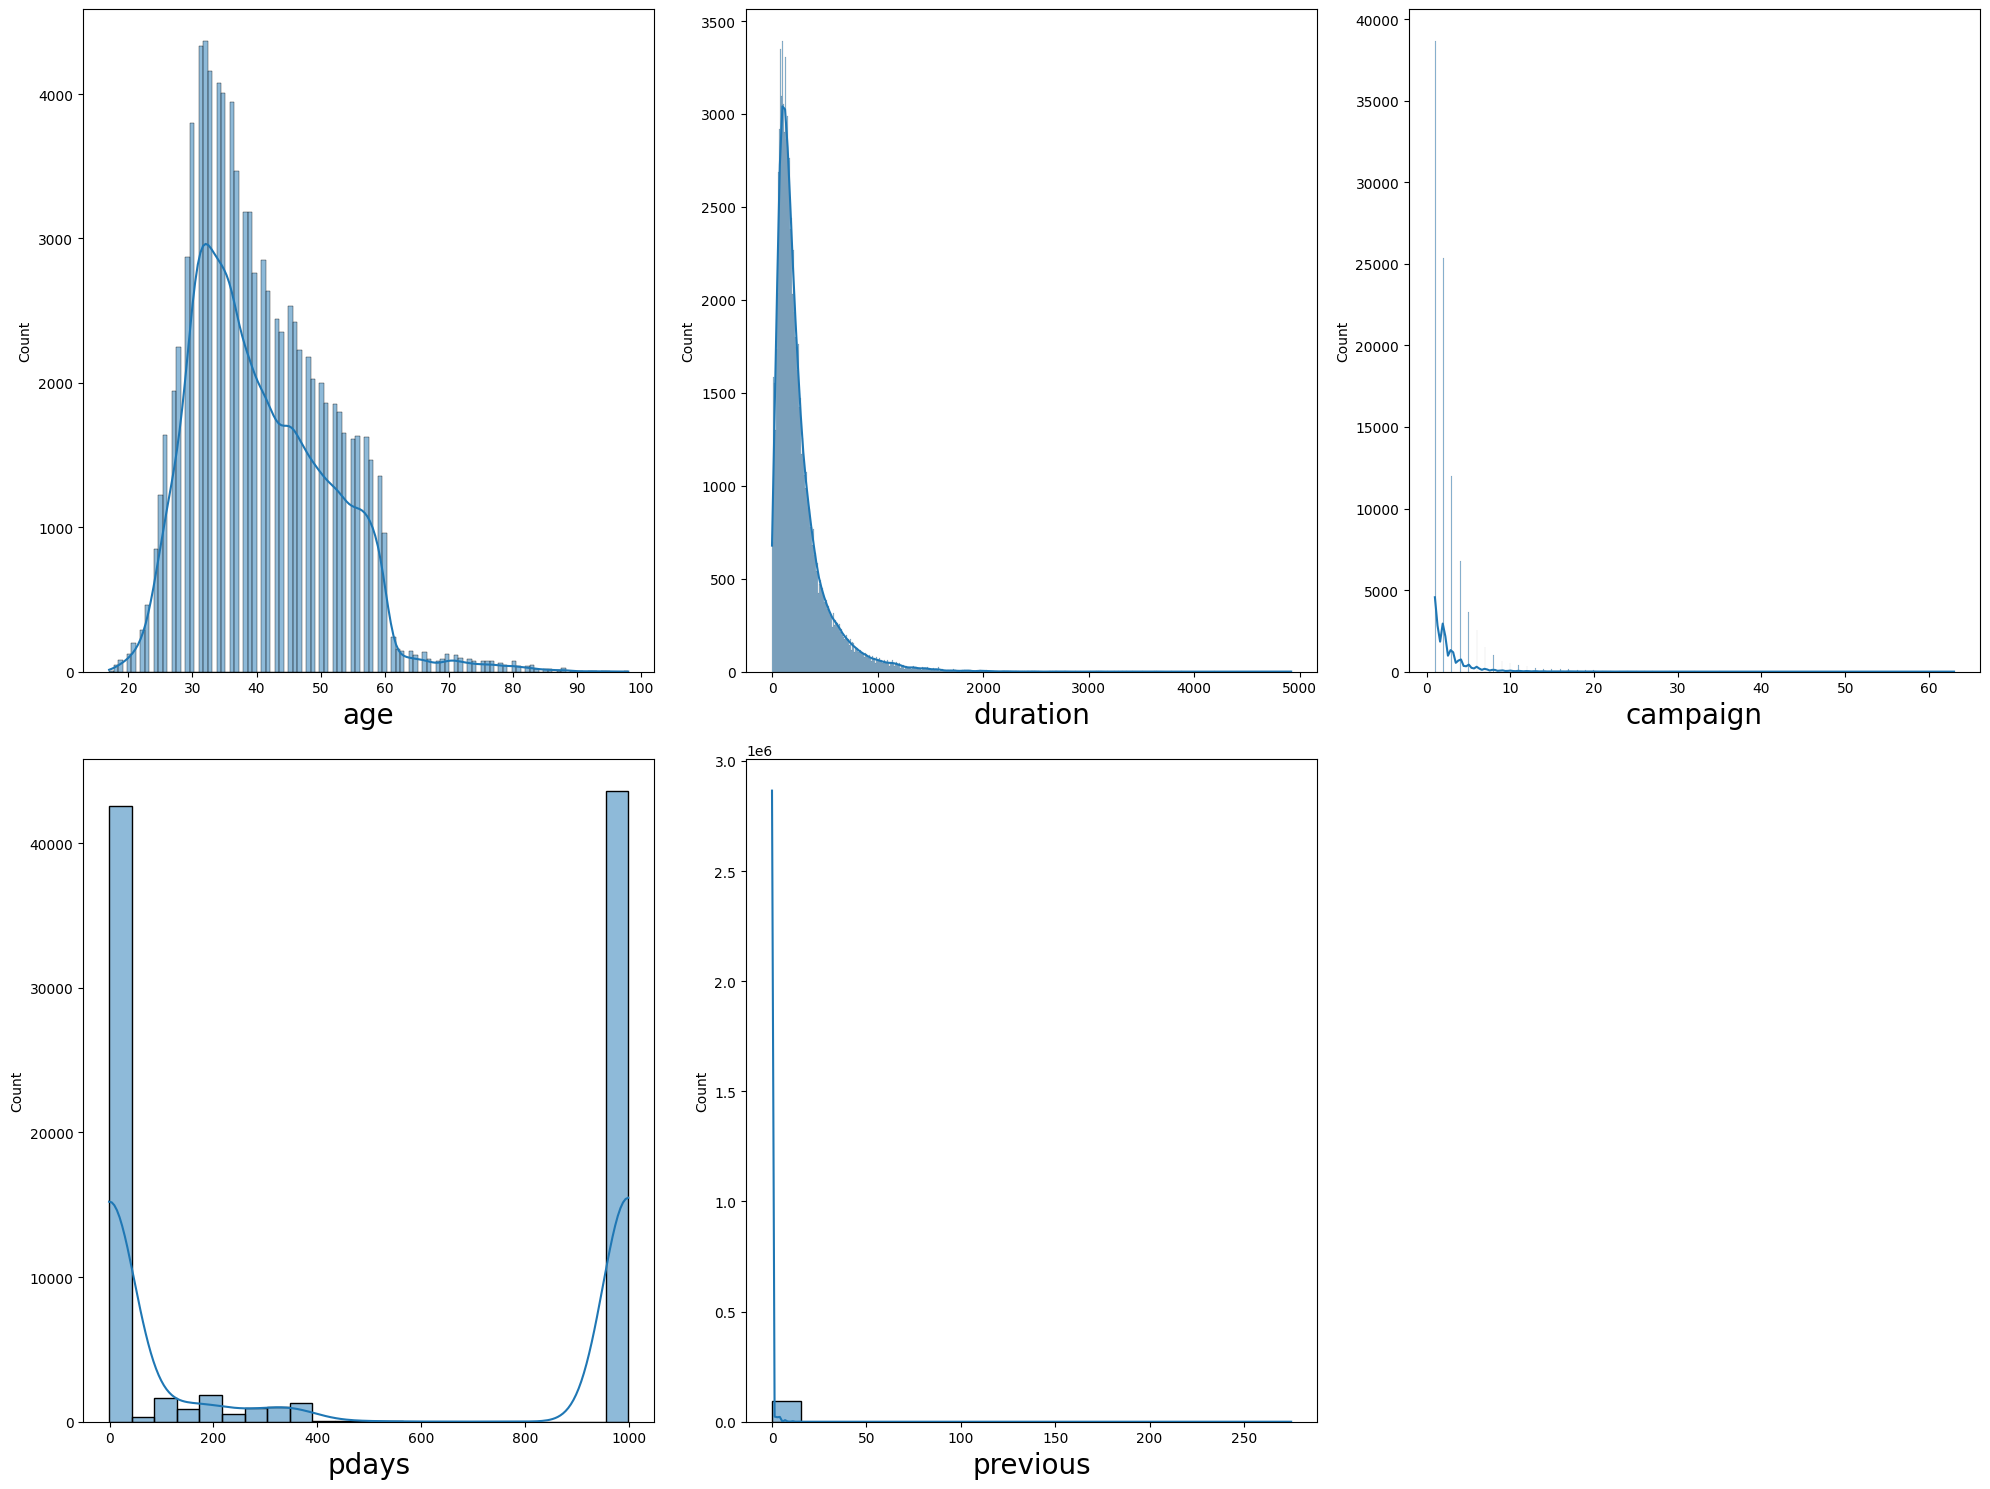

In [72]:
plt.figure(figsize=(20,15)) # define the plot size
plt_num = 1
for column in continous_column:
    if plt_num <= 5:
        plt.subplot(2,3,plt_num) # define how many rows or columns
        sns.histplot(continous_column[column],kde=True) # create hisplot it is use only for continous columns
        plt.xlabel(column,fontsize = 20)
    plt_num += 1
plt.tight_layout()

**Insights:-**
* Here not follow normal distribution any columns.
* Here Lot of customer age between 20 and 60.

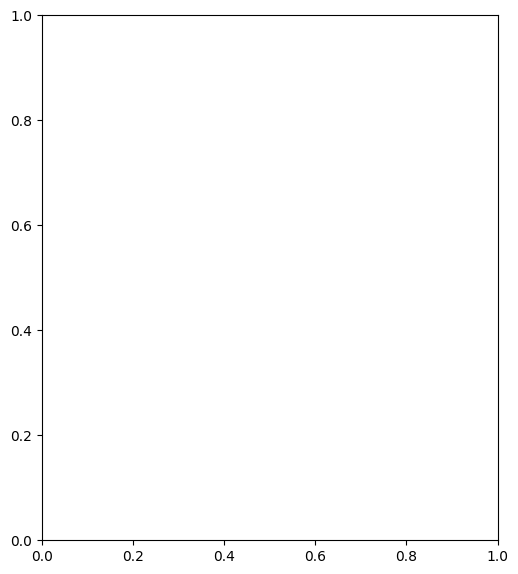

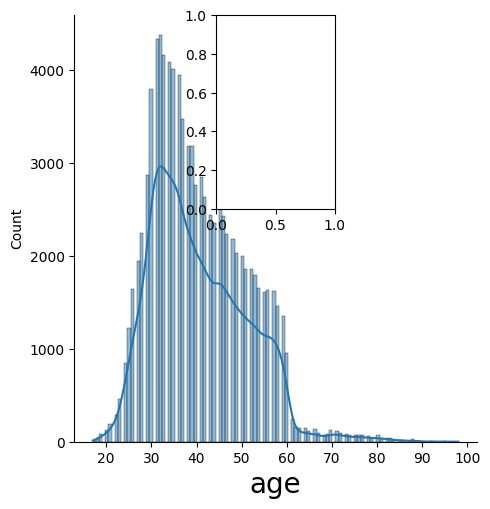

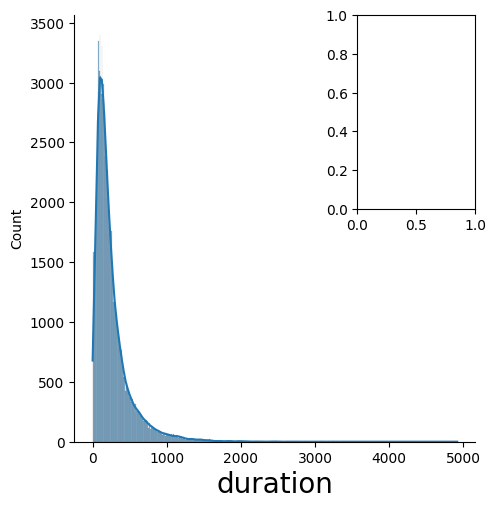

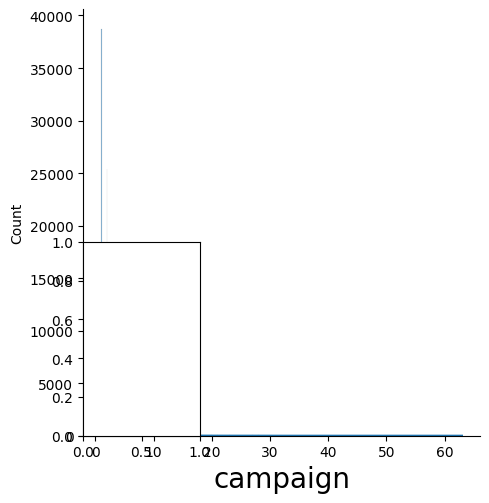

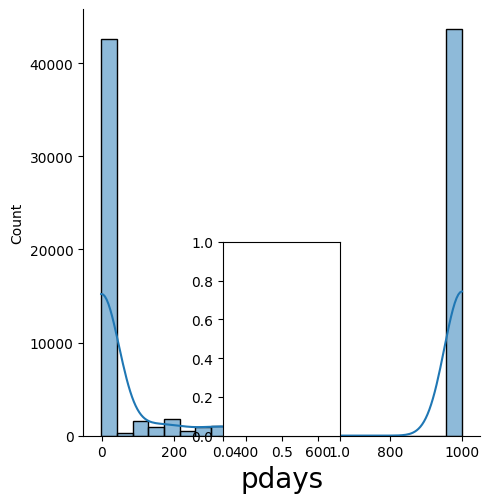

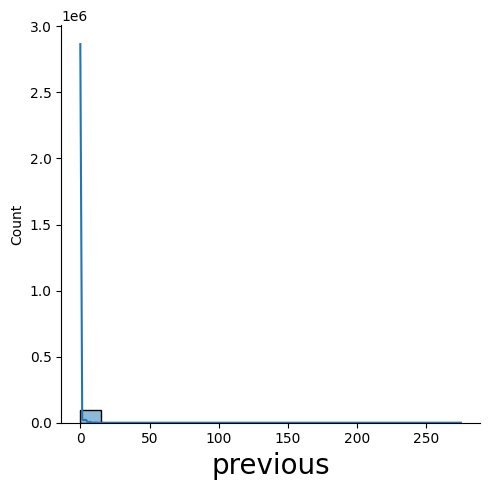

In [73]:
plt.figure(figsize=(20,15)) # define the plot size 
plt_num = 1
for column in continous_column:
    if plt_num <= 5:
        plt.subplot(2,3,plt_num) # define how many rows or columns
        sns.displot(continous_column[column],kde=True) # create displot it is use only for categorical columns
        plt.xlabel(column,fontsize = 20)
    plt_num += 1
plt.tight_layout()

### 3. Biavariant Analysis

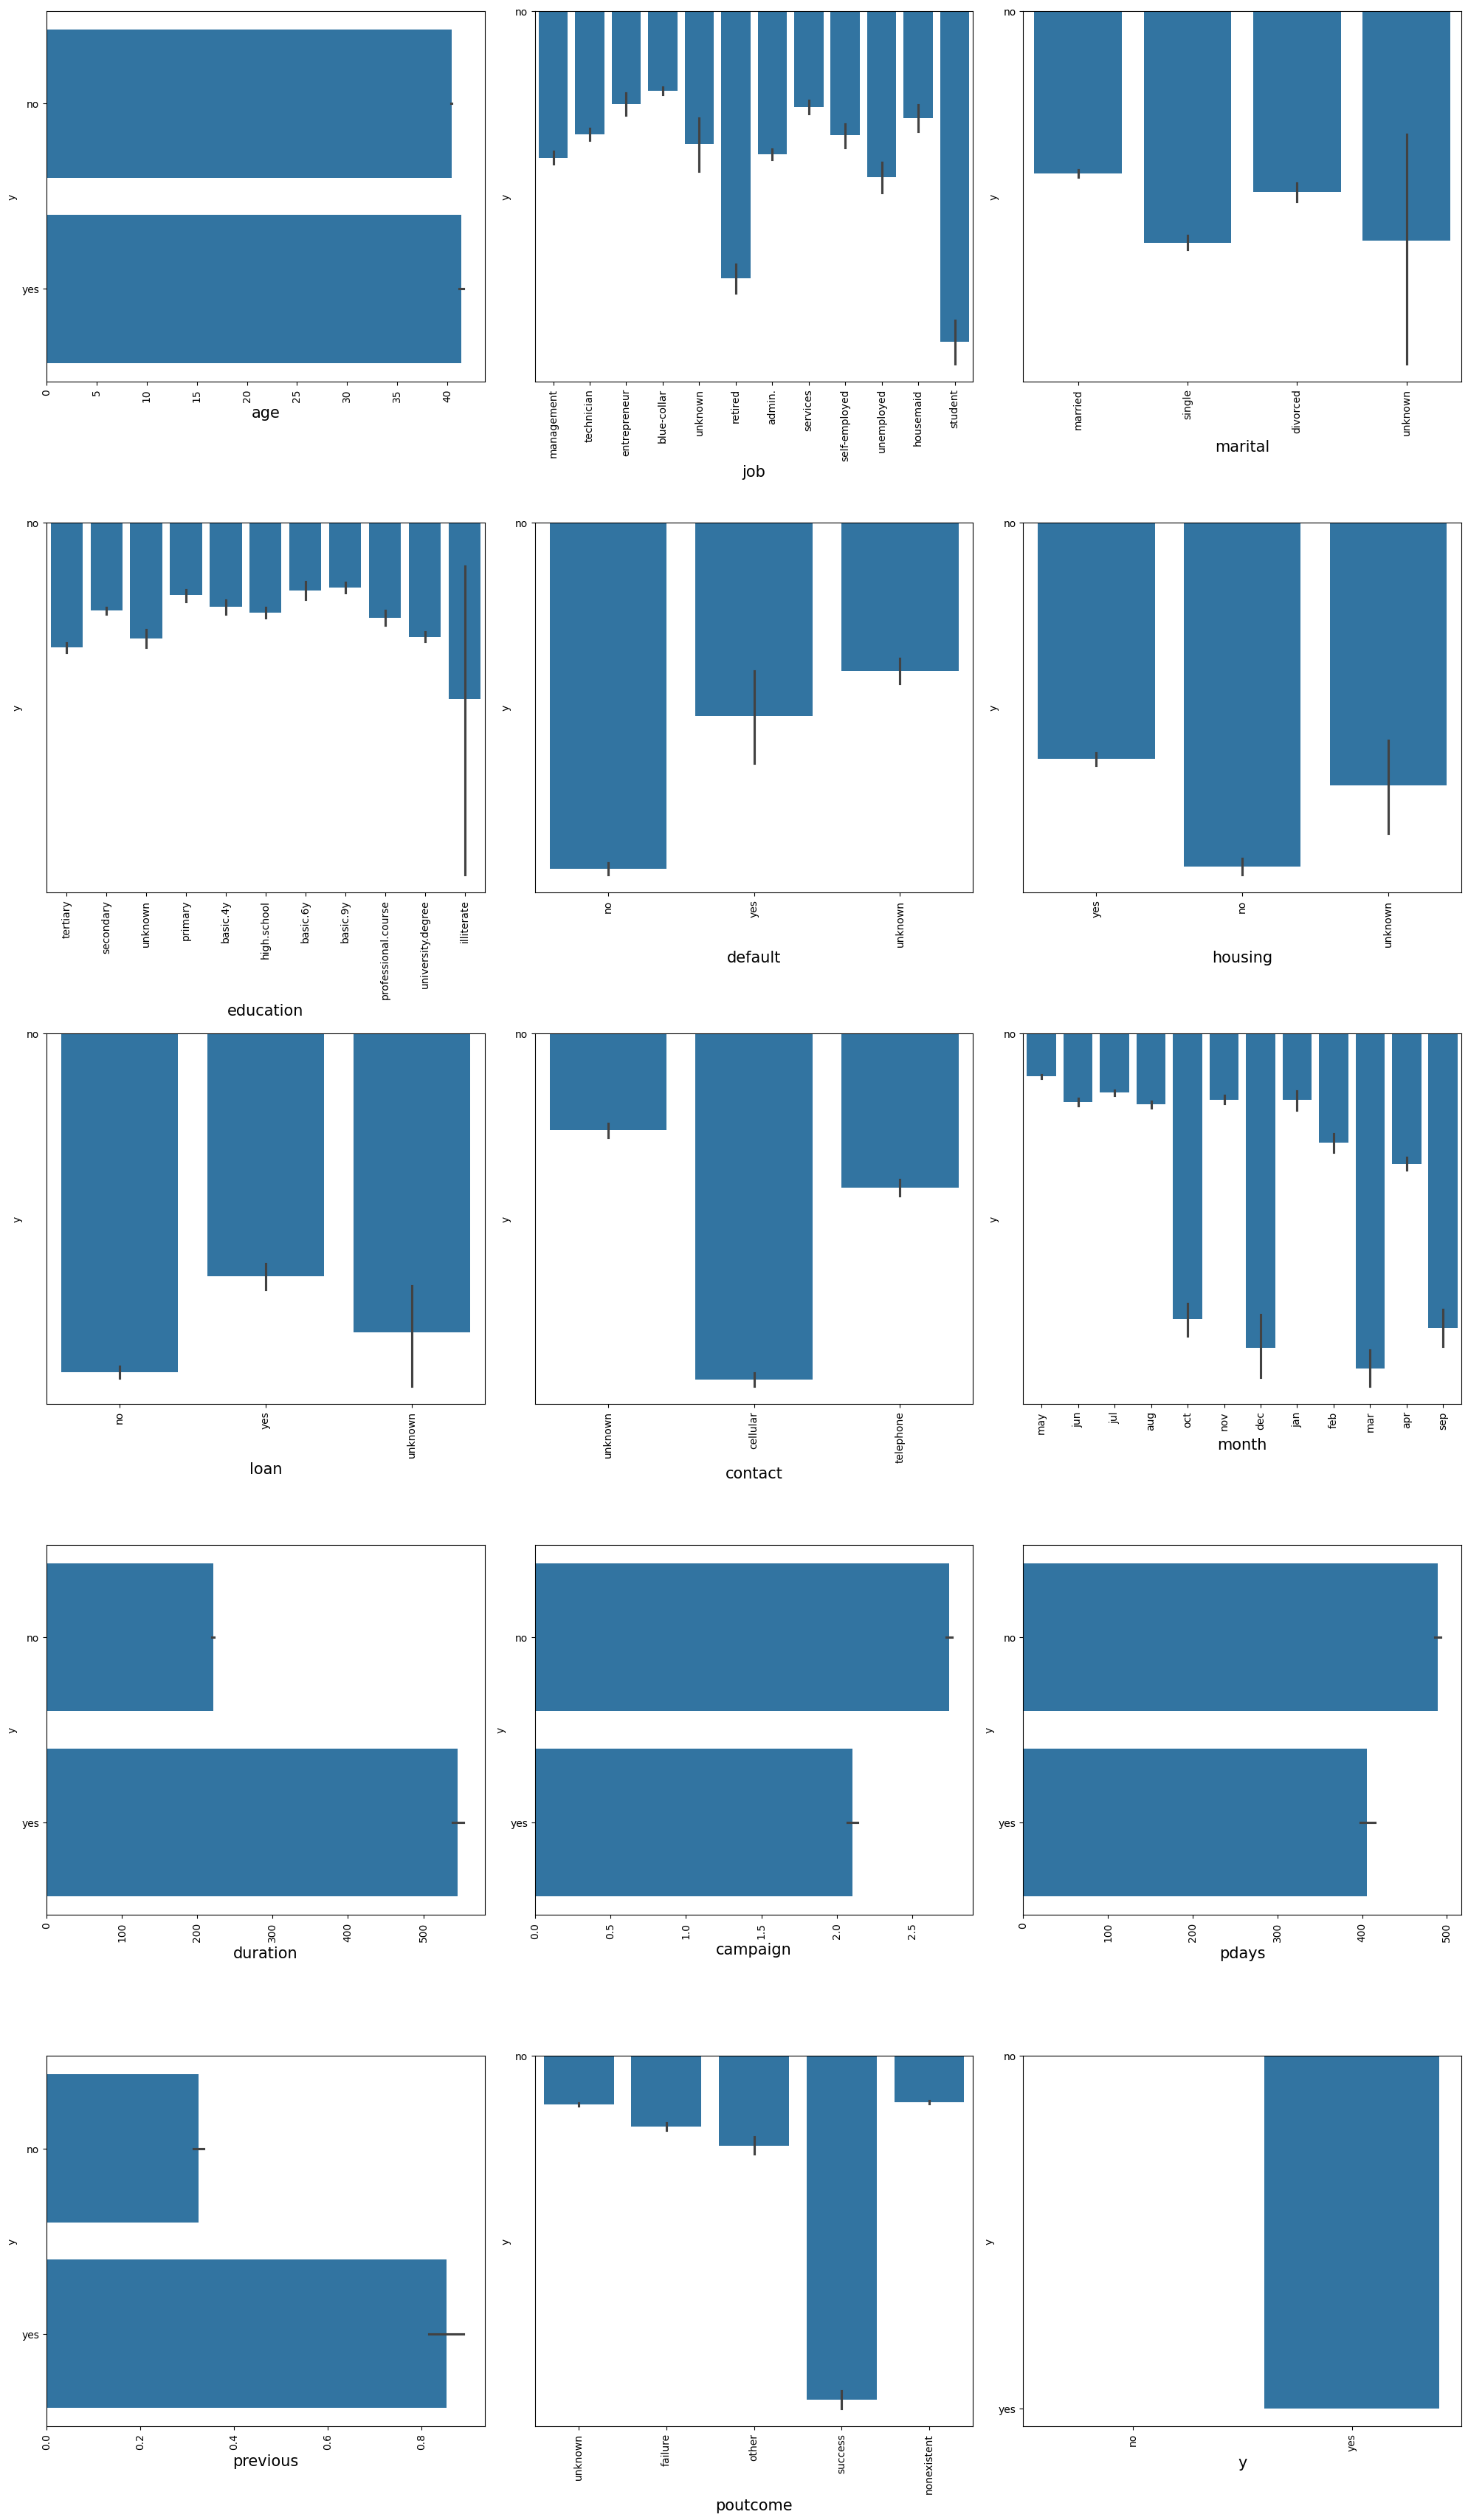

In [74]:
plt.figure(figsize=(20,40)) # define the plot size
plt_num = 1
for column in data2:
    if plt_num <= 15:
        plt.subplot(6,3,plt_num) # define the how many rows or columns
        sns.barplot(x = data2[column], y = data2["y"]) # create barplot for categorical column or comparision with target variable
        plt.xlabel(column,fontsize = 15)
        plt.xticks(rotation=90)
    plt_num += 1
plt.tight_layout()

**Insights:-**
* Here highest student related job customer in this bank.
* Here Highest Unknown realted marital customer in this bank.
* Here Highest illiterate realted education customer in this bank.
* Here Highest no housing loan realted customer in this bank.
* Here Highest np personal loan realted customer in this bank.
* Here Highest cellular realted contact customer in this bank.
* Here Highest march realted month customer buy prodcut in this bank.

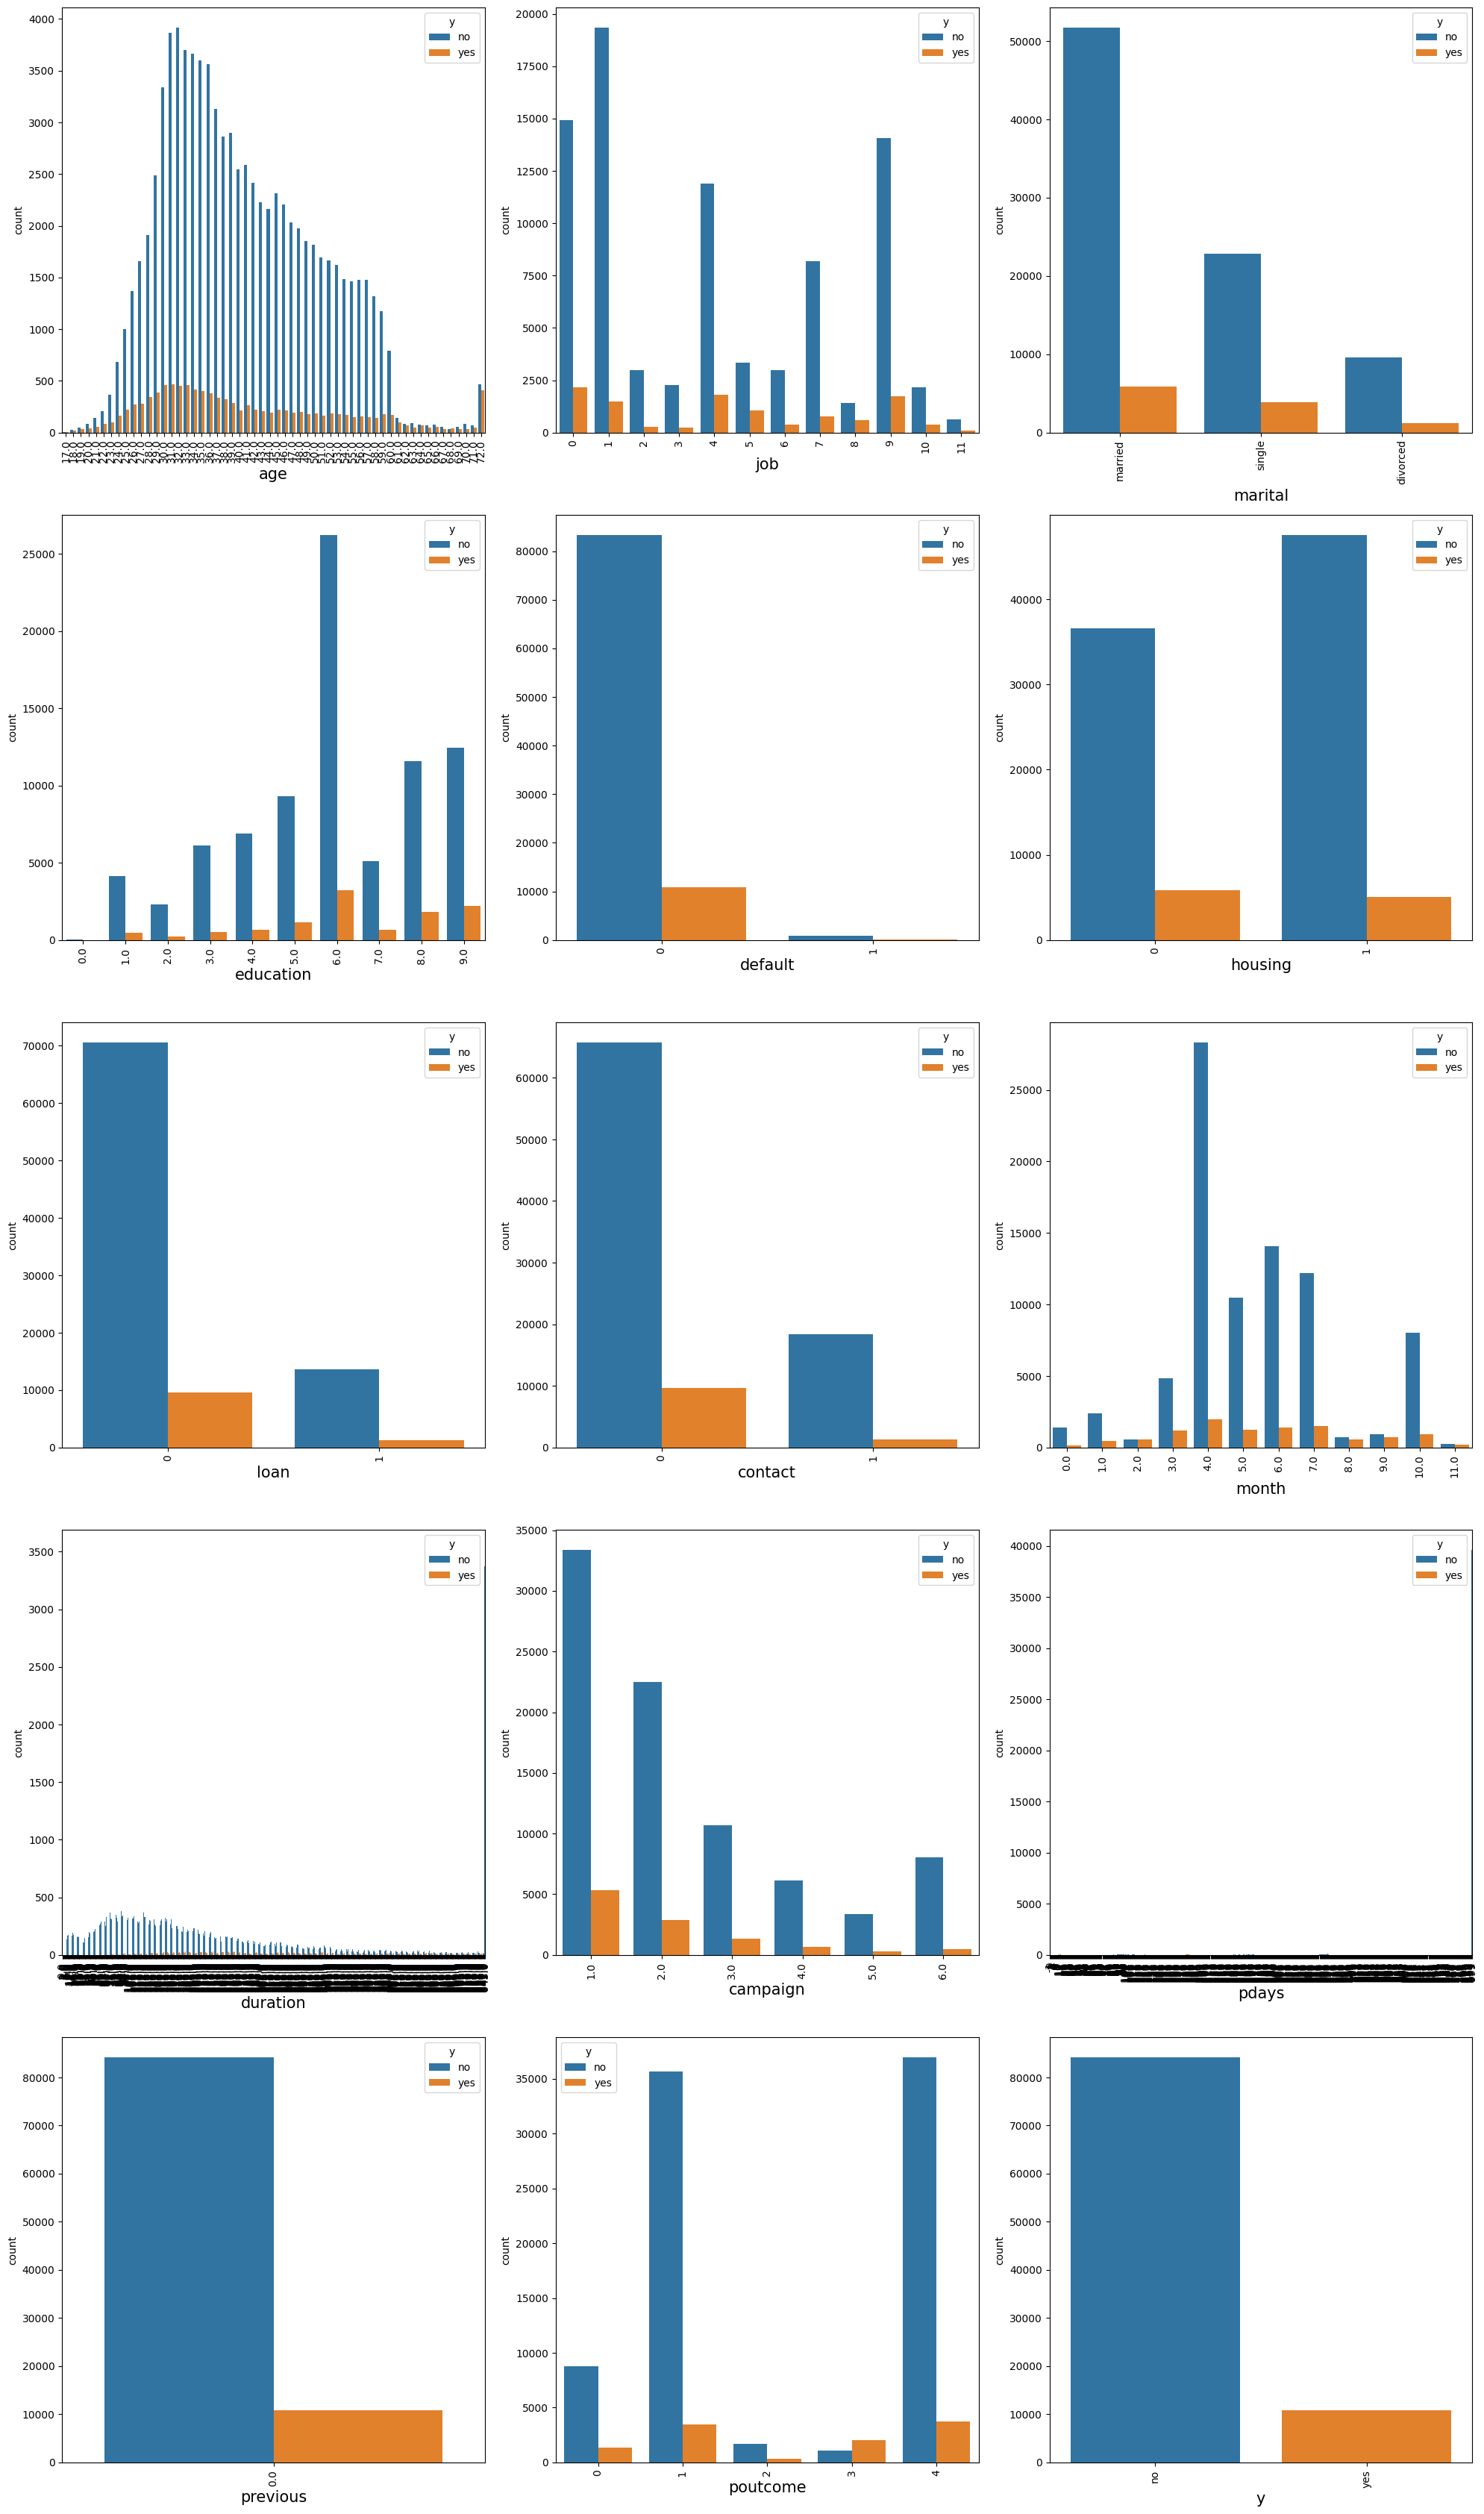

In [633]:
plt.figure(figsize=(20,40)) # define the plot size
plt_num = 1
for column in data2:
    if plt_num <= 15:
        plt.subplot(6,3,plt_num) # define the how many rows or how many columns
        sns.countplot(x = data2[column], hue = data2["y"]) #create countplot for comaprision with target variable
        plt.xlabel(column,fontsize = 15)
        plt.xticks(rotation=90)
    plt_num += 1
plt.tight_layout()

**Insights:-**
* Here highest not married coustomer in this bank.

### 3. Multivariant Analysis

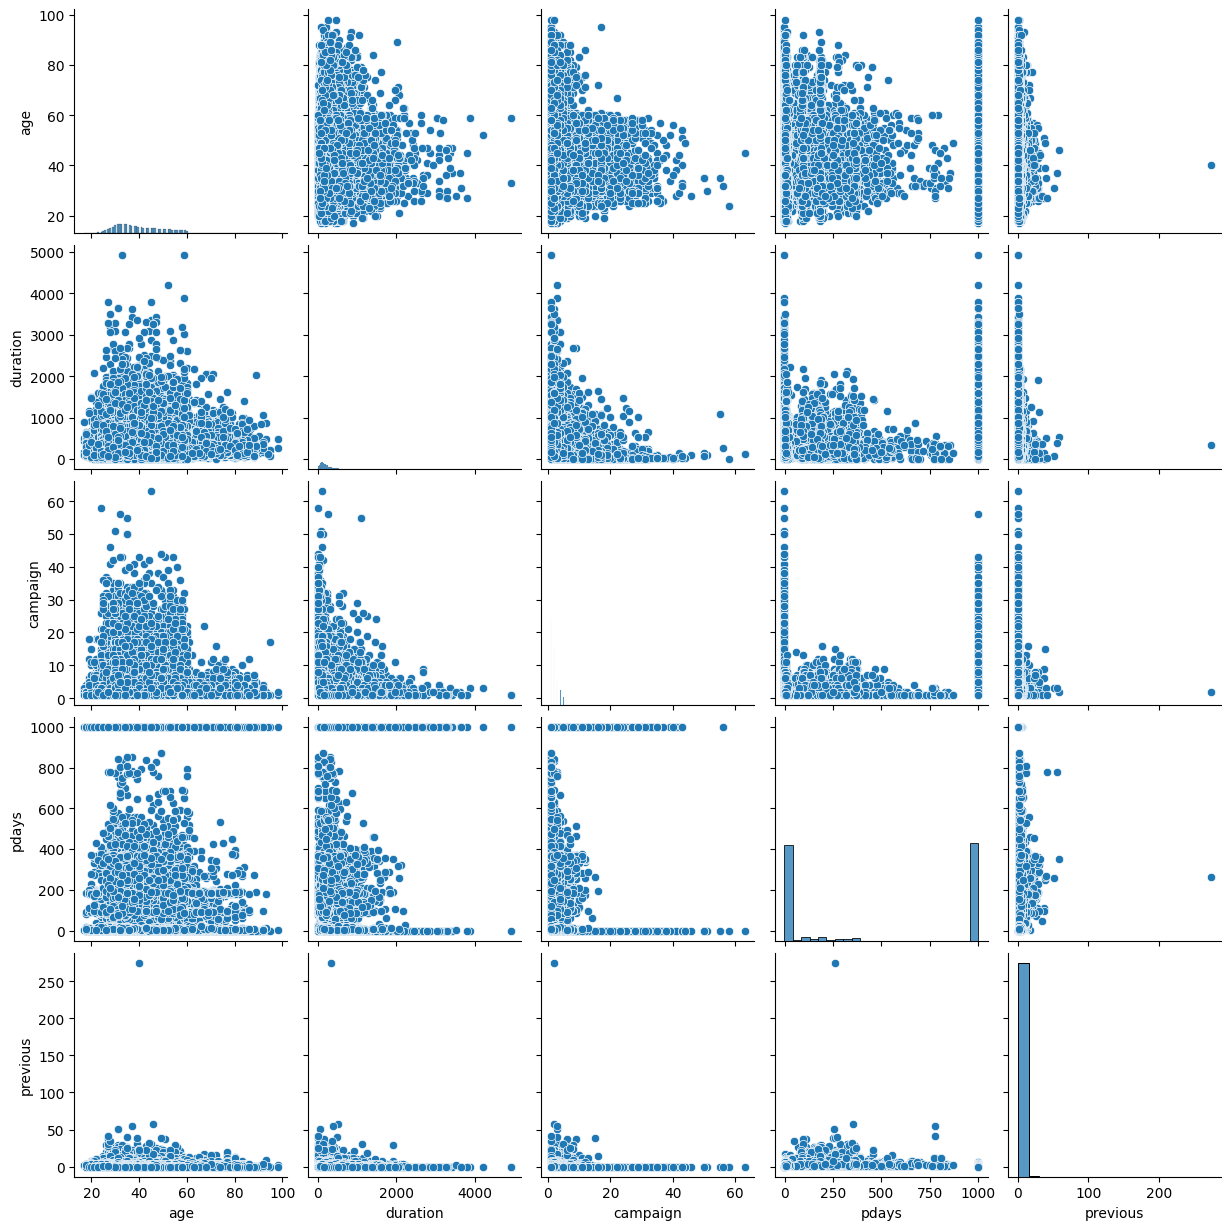

In [75]:
sns.pairplot(data2) # create pairplot use for all column comapre withe another all columns and target variable

**Insights:-**
* Here not find any pattern in this data.

### Final EDA Report:-
* Here not follow normal distribution any columns.
* Here Lot of customer age between 20 and 60.
* Here highest student related job customer in this bank.
* Here Highest Unknown realted marital customer in this bank.
* Here Highest illiterate realted education customer in this bank.
* Here Highest no housing loan realted customer in this bank.
* Here Highest np personal loan realted customer in this bank.
* Here Highest cellular realted contact customer in this bank.
* Here Highest march realted month customer buy prodcut in this bank.

## Feature Engineering

**Feature Engineering:-** 
* It is the process of selecting, modifying, or creating features (input variables) from raw data to improve the performance of machine learning models. It involves transforming raw data into a format that better represents the problem for the algorithm, leading to more accurate predictions.

### 1. Data Preprocessing

**Data preprocessing:-** 
* It is a critical step in the data analysis and machine learning workflow. It involves preparing raw data for analysis or model training by transforming it into a clean, structured, and usable format. Proper preprocessing improves data quality and ensures that models perform better and generalize well to unseen data.

In [76]:
data2.isnull().sum() # check the null values or not

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

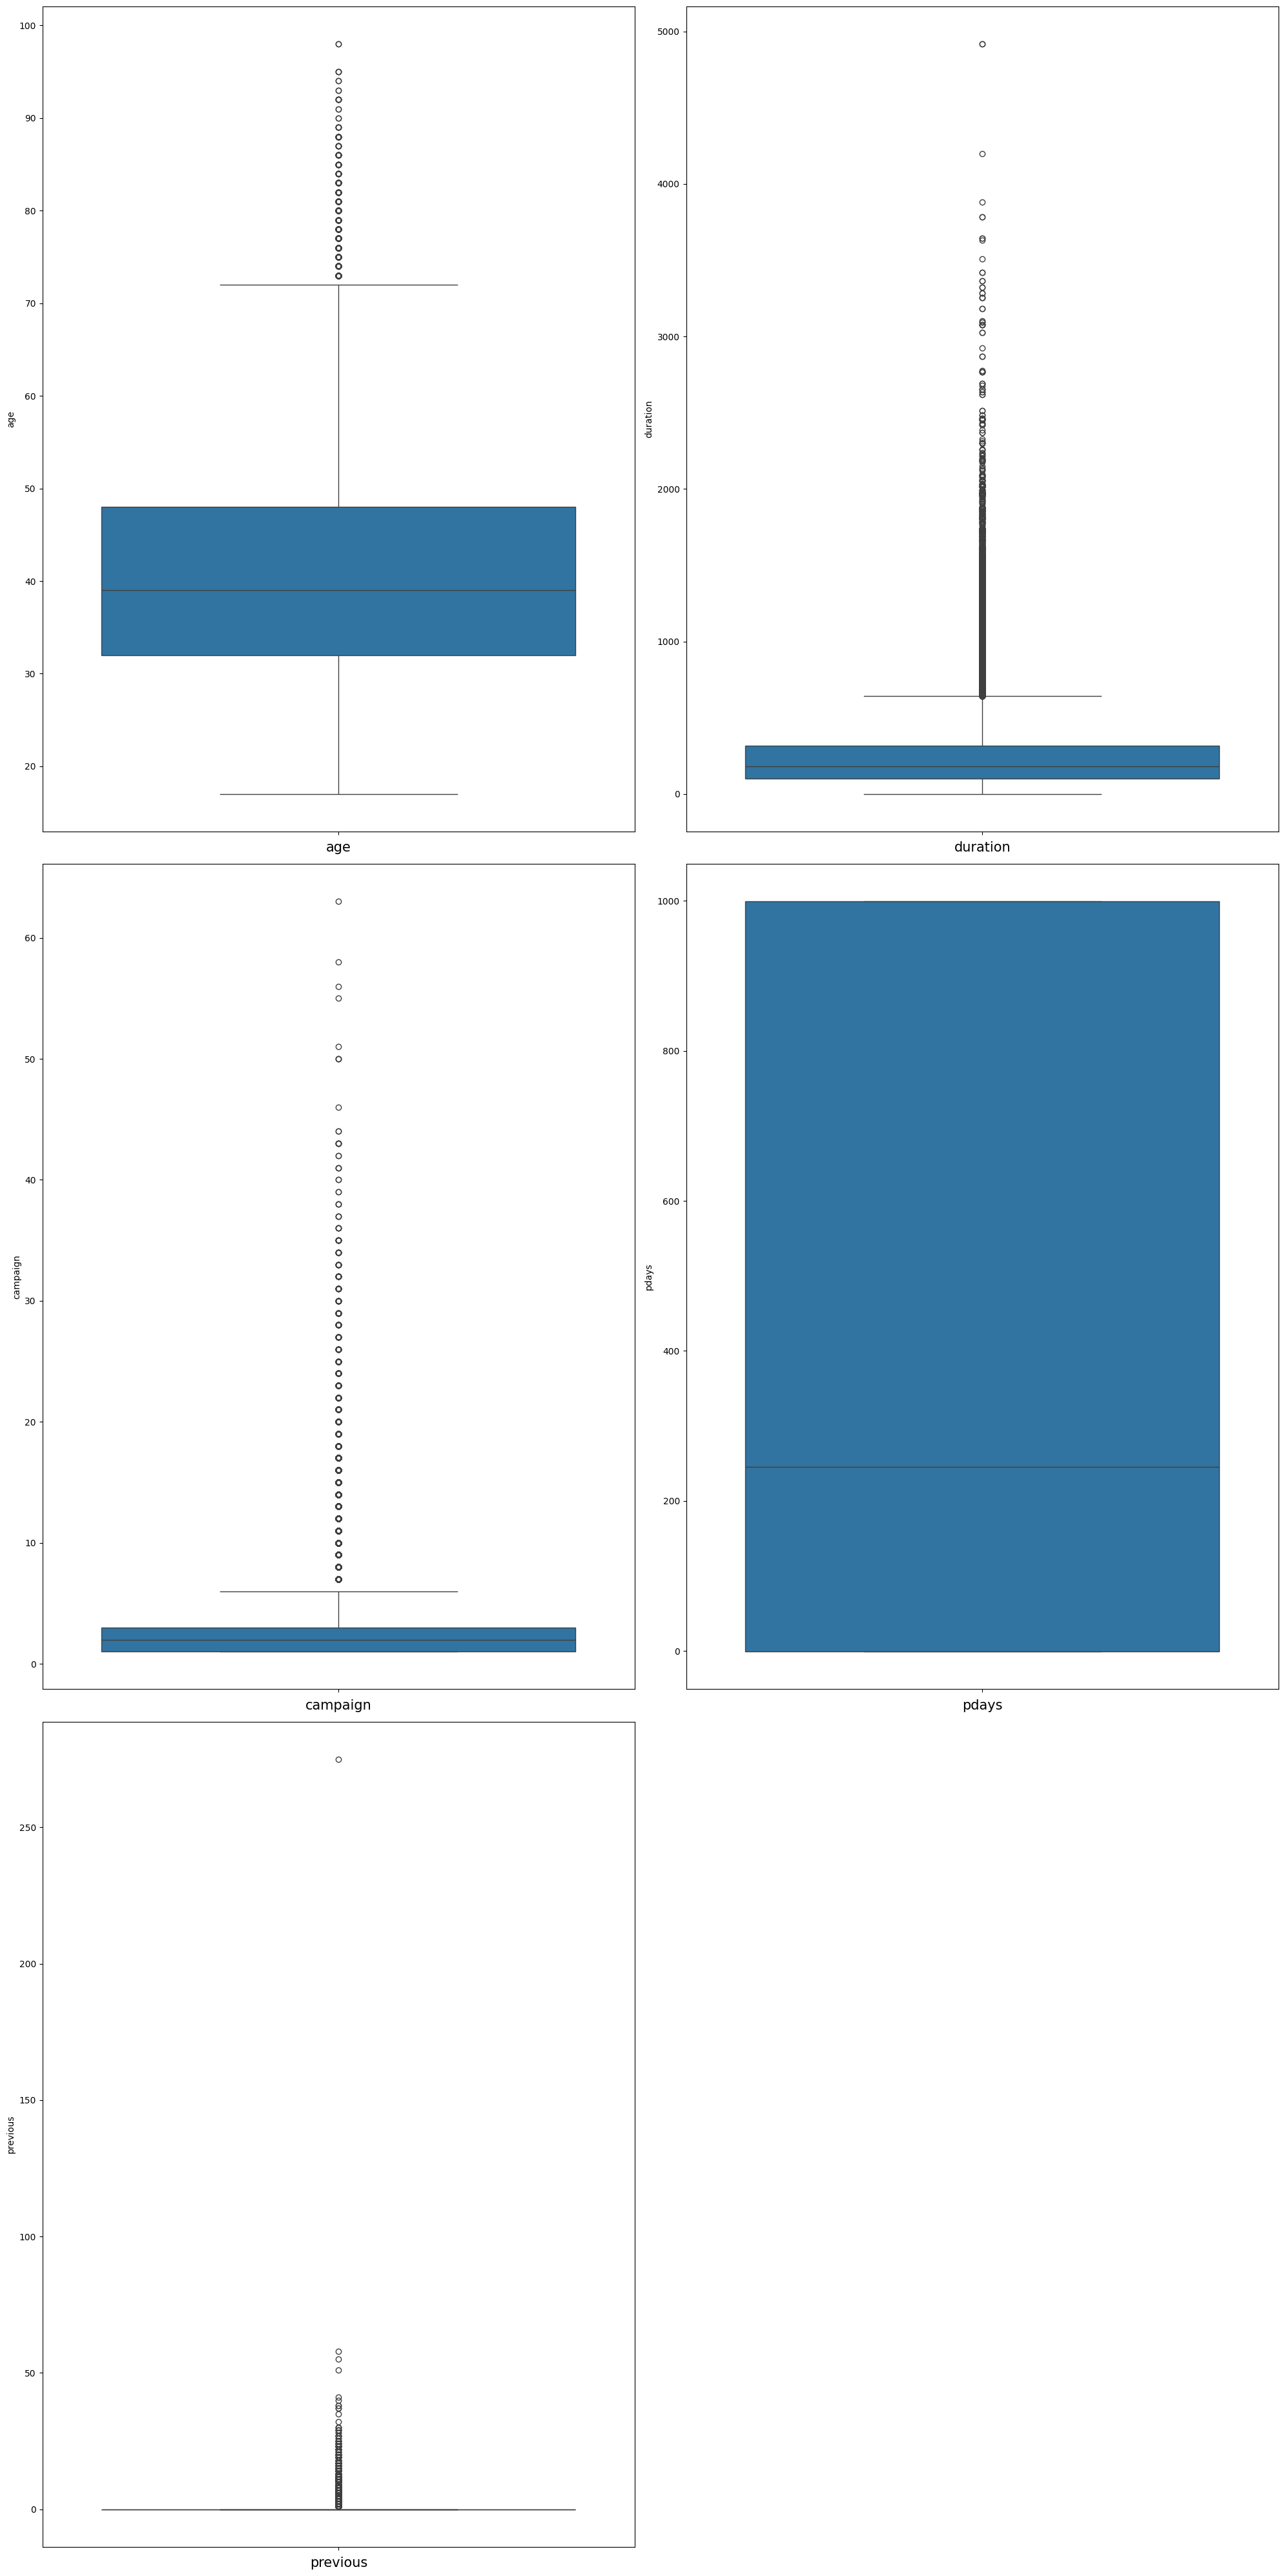

In [77]:
plt.figure(figsize=(20,40)) # define the plot size
plt_num = 1
for column in continous_column:
    if plt_num <= 5:
        plt.subplot(3,2,plt_num) # define the how many rows or how many columns
        sns.boxplot(continous_column[column]) # create the boxplot use for check the outliers or not
        plt.xlabel(column,fontsize = 15)
        plt.xticks(rotation=90)
    plt_num += 1
plt.tight_layout()

In [78]:
# here we are find the 5 number summary 
for col in data2.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data2[col].quantile(0.25) # find Q1
    Q3 = data2[col].quantile(0.75) # find Q3
    IQR = Q3 - Q1 # find the IQR
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR # find Lower boundry
    upper_bound = Q3 + 1.5 * IQR # find upper boundry
    
    # Replace outliers with NaN (or cap them)
    data2[col] = data2[col].apply(lambda x: max(min(x, upper_bound), lower_bound)) # handle the outliers with use IQR method

In [79]:
continous_column

,age,duration,campaign,pdays,previous
0,58,261,1,-1,0
1,44,151,1,-1,0
2,33,76,1,-1,0
3,47,92,1,-1,0
4,33,198,1,-1,0
...,...,...,...,...,...
95034,30,53,1,999,0
95035,39,219,1,999,0
95036,27,64,2,999,1
95037,58,528,1,999,0


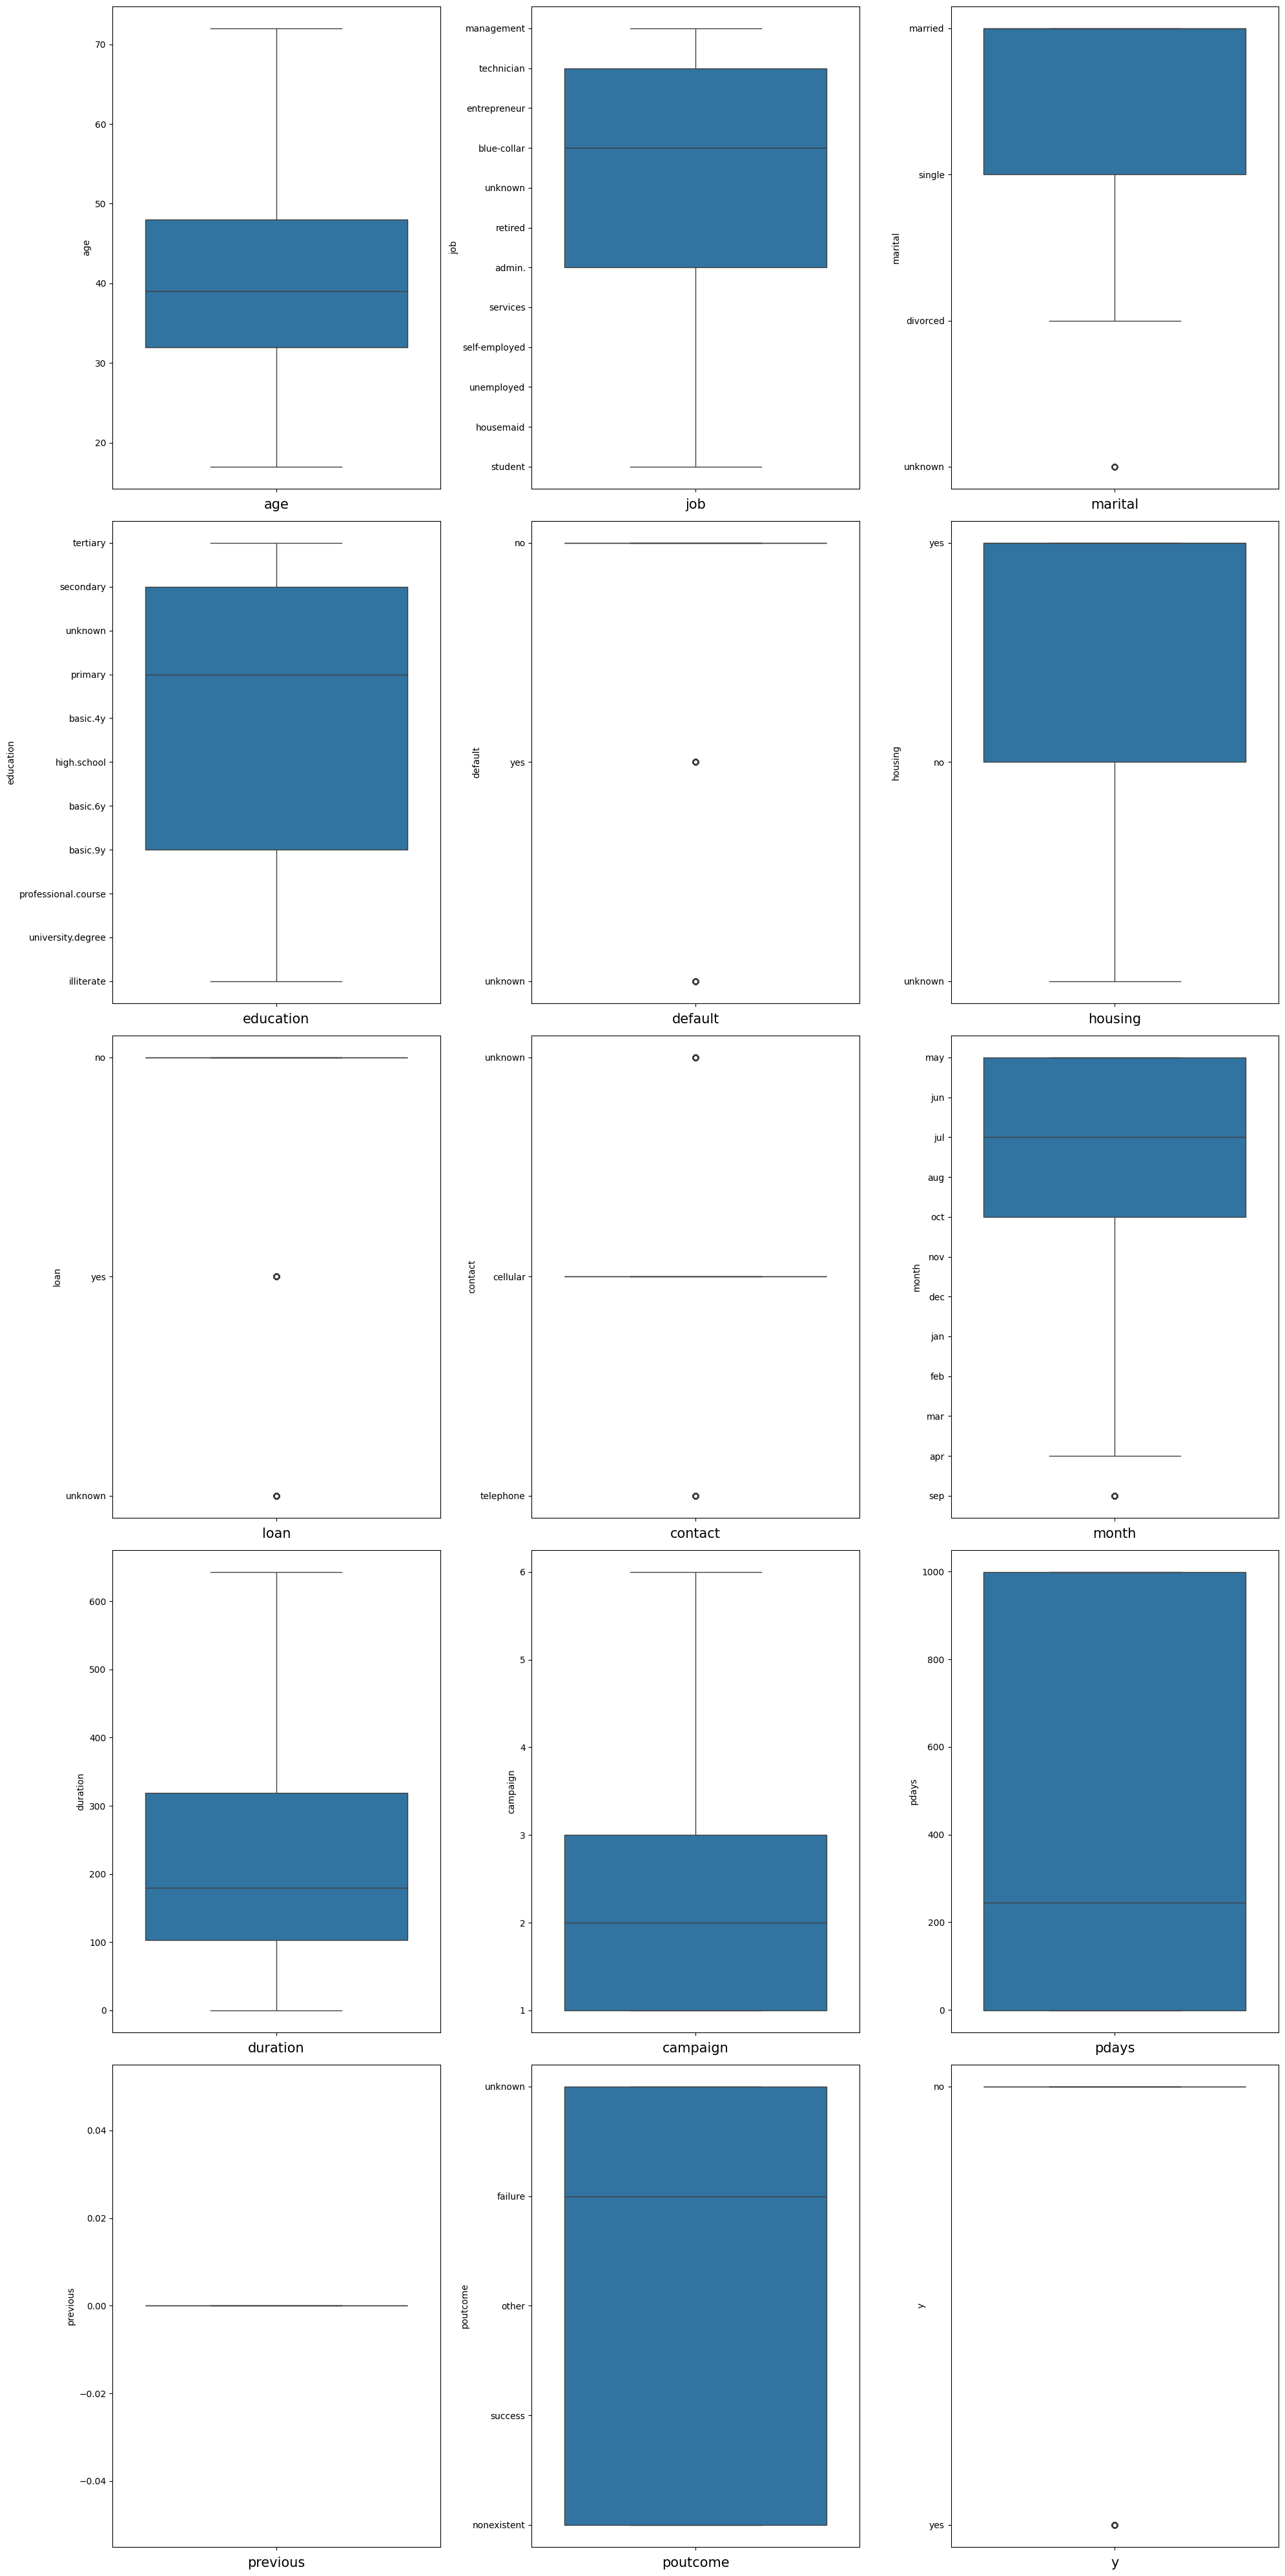

In [81]:
plt.figure(figsize=(20,40)) # define the plot size
plt_num = 1
for column in data2:
    if plt_num <= 15:
        plt.subplot(5,3,plt_num) # define the how many column or rows
        sns.boxplot(data2[column]) # create boxplot use for check outliers or not
        plt.xlabel(column,fontsize = 15)
        plt.xticks(rotation=90)
    plt_num += 1
plt.tight_layout()

In [82]:
data2.head() # show the top 5 rows

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,yes,no,unknown,may,261.0,1.0,-1,0.0,unknown,no
1,44.0,technician,single,secondary,no,yes,no,unknown,may,151.0,1.0,-1,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,yes,yes,unknown,may,76.0,1.0,-1,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,yes,no,unknown,may,92.0,1.0,-1,0.0,unknown,no
4,33.0,unknown,single,unknown,no,no,no,unknown,may,198.0,1.0,-1,0.0,unknown,no


In [84]:
data2["job"].unique() # check the unique values

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [85]:
data2["default"].unique() # check the unique values

array(['no', 'yes', 'unknown'], dtype=object)

In [86]:
data2["housing"].unique() # check the unique values

array(['yes', 'no', 'unknown'], dtype=object)

In [87]:
data2["loan"].unique() # check the unique values

array(['no', 'yes', 'unknown'], dtype=object)

In [88]:
data2["month"].unique() # check the unique values

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [89]:
data2["poutcome"].unique() # check the unique values

array(['unknown', 'failure', 'other', 'success', 'nonexistent'],
      dtype=object)

In [90]:
data2["default"].mode() # find the mode values

0    no
Name: default, dtype: object

In [91]:
data2["housing"].mode()  # find the mode values

0    yes
Name: housing, dtype: object

In [92]:
data2["loan"].mode()  # find the mode values

0    no
Name: loan, dtype: object

In [94]:
data2["poutcome"].mode()  # find the mode values

0    unknown
Name: poutcome, dtype: object

In [96]:
data2.loc[data2["default"] == "unknown","default"] = "no" # handle the outliers

In [97]:
data2.loc[data2["housing"] == "unknown","housing"] = "yes" # handle the outliers

In [98]:
data2.loc[data2["loan"] == "unknown","loan"] = "no" # handle the outliers

In [101]:
data2["contact"].unique() # check the unique values

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [102]:
data2["contact"].mode()  # find the mode values

0    cellular
Name: contact, dtype: object

In [103]:
data2.loc[data2["contact"] == "unknown","contact"] = "cellular" # handle the outliers

In [104]:
data2.head() # show the top 5 rows

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,yes,no,cellular,may,261.0,1.0,-1,0.0,unknown,no
1,44.0,technician,single,secondary,no,yes,no,cellular,may,151.0,1.0,-1,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,yes,yes,cellular,may,76.0,1.0,-1,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,yes,no,cellular,may,92.0,1.0,-1,0.0,unknown,no
4,33.0,unknown,single,unknown,no,no,no,cellular,may,198.0,1.0,-1,0.0,unknown,no


### Encoding Technique

**Encoding:-**
* It is the process of converting categorical data into a numerical format that can be used by machine learning models. Since most machine learning algorithms work with numerical inputs, encoding ensures that categorical features (text or labels) are represented in a way that preserves information and relationships.

* There are three types if encoding
    1. Label Encoding
    2. OneHot Encoding
    3. Ordinal Encoding

In [105]:
from sklearn.preprocessing import LabelEncoder # import the lable encoding
LE = LabelEncoder() # call the label encoding
data2["job"] = LE.fit_transform(data2["job"])           # transform the data
data2["default"] = LE.fit_transform(data2["default"])   # transform the data
data2["housing"] = LE.fit_transform(data2["housing"])   # transform the data
data2["loan"] = LE.fit_transform(data2["loan"])         # transform the data
data2["contact"] = LE.fit_transform(data2["contact"])   # transform the data
data2["poutcome"] = LE.fit_transform(data2["poutcome"]) # transform the data

In [106]:
data2["education"].unique() # find the unique values

array(['tertiary', 'secondary', 'unknown', 'primary', 'basic.4y',
       'high.school', 'basic.6y', 'basic.9y', 'professional.course',
       'university.degree', 'illiterate'], dtype=object)

In [107]:
data2["education"].mode() # find the mode values

0    secondary
Name: education, dtype: object

In [108]:
data2.loc[data2["education"] == "unknown","education"] = "secondary" # handle the outliers values

In [109]:
from sklearn.preprocessing import OrdinalEncoder # import the Ordinal endcoding

# Define the ordered levels for education
ordered_levels = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'primary', 
                  'high.school', 'secondary', 'professional.course', 
                  'university.degree', 'tertiary']

# Reshape the column to fit OrdinalEncoder's expected 2D input
education_column = data2[['education']]

# Initialize the OrdinalEncoder with the specified categories (order)
encoder = OrdinalEncoder(categories=[ordered_levels])

# Fit and transform the 'education' column
data2['education'] = encoder.fit_transform(education_column)

In [111]:
data2["month"].unique() # find the unique values

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [112]:
from sklearn.preprocessing import OrdinalEncoder # import the Ordinal endcoding

# Define the ordered months
ordered_months = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']

# Assuming 'month_column' is the column in your DataFrame containing month names
month_column = data2[['month']]  # Replace 'month' with your actual column name

# Initialize the OrdinalEncoder with the specified categories (month order)
encoder = OrdinalEncoder(categories=[ordered_months])

# Fit and transform the 'month' column
data2['month'] = encoder.fit_transform(month_column)

In [113]:
data2.head() # show the top 5 rows

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,4,married,9.0,0,1,0,0,4.0,261.0,1.0,-1,0.0,4,no
1,44.0,9,single,6.0,0,1,0,0,4.0,151.0,1.0,-1,0.0,4,no
2,33.0,2,married,6.0,0,1,1,0,4.0,76.0,1.0,-1,0.0,4,no
3,47.0,1,married,6.0,0,1,0,0,4.0,92.0,1.0,-1,0.0,4,no
4,33.0,11,single,6.0,0,0,0,0,4.0,198.0,1.0,-1,0.0,4,no


In [114]:
data2["marital"].unique() # find the unique values

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [115]:
data2["marital"].mode() # find the mode values

0    married
Name: marital, dtype: object

In [116]:
data2.loc[data2["marital"] == "unknown","marital"] = "married" # handle the outliers values

In [117]:
from sklearn.preprocessing import OneHotEncoder # import Onehot encoding
OHE = OneHotEncoder() # call the Onehot encoding
df = pd.get_dummies(data2["marital"],dtype="int",prefix="marital")
df

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
95034,0,1,0
95035,0,1,0
95036,0,0,1
95037,0,1,0


In [118]:
data3 = pd.concat([data2,df],axis=1) # concate the two tables
data3

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y,marital_divorced,marital_married,marital_single
0,58.0,4,married,9.0,0,1,0,0,4.0,261.0,1.0,-1,0.0,4,no,0,1,0
1,44.0,9,single,6.0,0,1,0,0,4.0,151.0,1.0,-1,0.0,4,no,0,0,1
2,33.0,2,married,6.0,0,1,1,0,4.0,76.0,1.0,-1,0.0,4,no,0,1,0
3,47.0,1,married,6.0,0,1,0,0,4.0,92.0,1.0,-1,0.0,4,no,0,1,0
4,33.0,11,single,6.0,0,0,0,0,4.0,198.0,1.0,-1,0.0,4,no,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95034,30.0,0,married,2.0,0,1,1,0,6.0,53.0,1.0,999,0.0,1,no,0,1,0
95035,39.0,0,married,5.0,0,1,0,1,6.0,219.0,1.0,999,0.0,1,no,0,1,0
95036,27.0,8,single,5.0,0,0,0,0,4.0,64.0,2.0,999,0.0,0,no,0,0,1
95037,58.0,0,married,5.0,0,0,0,0,7.0,528.0,1.0,999,0.0,1,no,0,1,0


In [119]:
data3.drop(["marital"],axis=1,inplace=True) # drop the columns

In [120]:
data3.head() # show the top 5 rows

,age,job,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y,marital_divorced,marital_married,marital_single
0,58.0,4,9.0,0,1,0,0,4.0,261.0,1.0,-1,0.0,4,no,0,1,0
1,44.0,9,6.0,0,1,0,0,4.0,151.0,1.0,-1,0.0,4,no,0,0,1
2,33.0,2,6.0,0,1,1,0,4.0,76.0,1.0,-1,0.0,4,no,0,1,0
3,47.0,1,6.0,0,1,0,0,4.0,92.0,1.0,-1,0.0,4,no,0,1,0
4,33.0,11,6.0,0,0,0,0,4.0,198.0,1.0,-1,0.0,4,no,0,0,1


In [121]:
data3["y"].unique() # find the unique values

array(['no', 'yes'], dtype=object)

In [122]:
data3["y"] = data3["y"].replace({"no": 0, "yes": 1}) # replace the values

In [126]:
data3.drop(["previous"],axis=1,inplace=True) # drop the columns

In [129]:
data3.pdays.unique() # find the unique values

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [127]:
data3.head() # show the top 5 rows

,age,job,education,default,housing,loan,contact,month,duration,campaign,pdays,poutcome,y,marital_divorced,marital_married,marital_single
0,58.0,4,9.0,0,1,0,0,4.0,261.0,1.0,-1,4,0,0,1,0
1,44.0,9,6.0,0,1,0,0,4.0,151.0,1.0,-1,4,0,0,0,1
2,33.0,2,6.0,0,1,1,0,4.0,76.0,1.0,-1,4,0,0,1,0
3,47.0,1,6.0,0,1,0,0,4.0,92.0,1.0,-1,4,0,0,1,0
4,33.0,11,6.0,0,0,0,0,4.0,198.0,1.0,-1,4,0,0,0,1


### Feature Selection

**Feature Selection:-**
* It is the process of identifying and selecting the most relevant and important features (variables) from a dataset for use in a predictive model. The goal is to improve the model’s performance by reducing complexity, minimizing overfitting, and enhancing interpretability.

<Axes: >

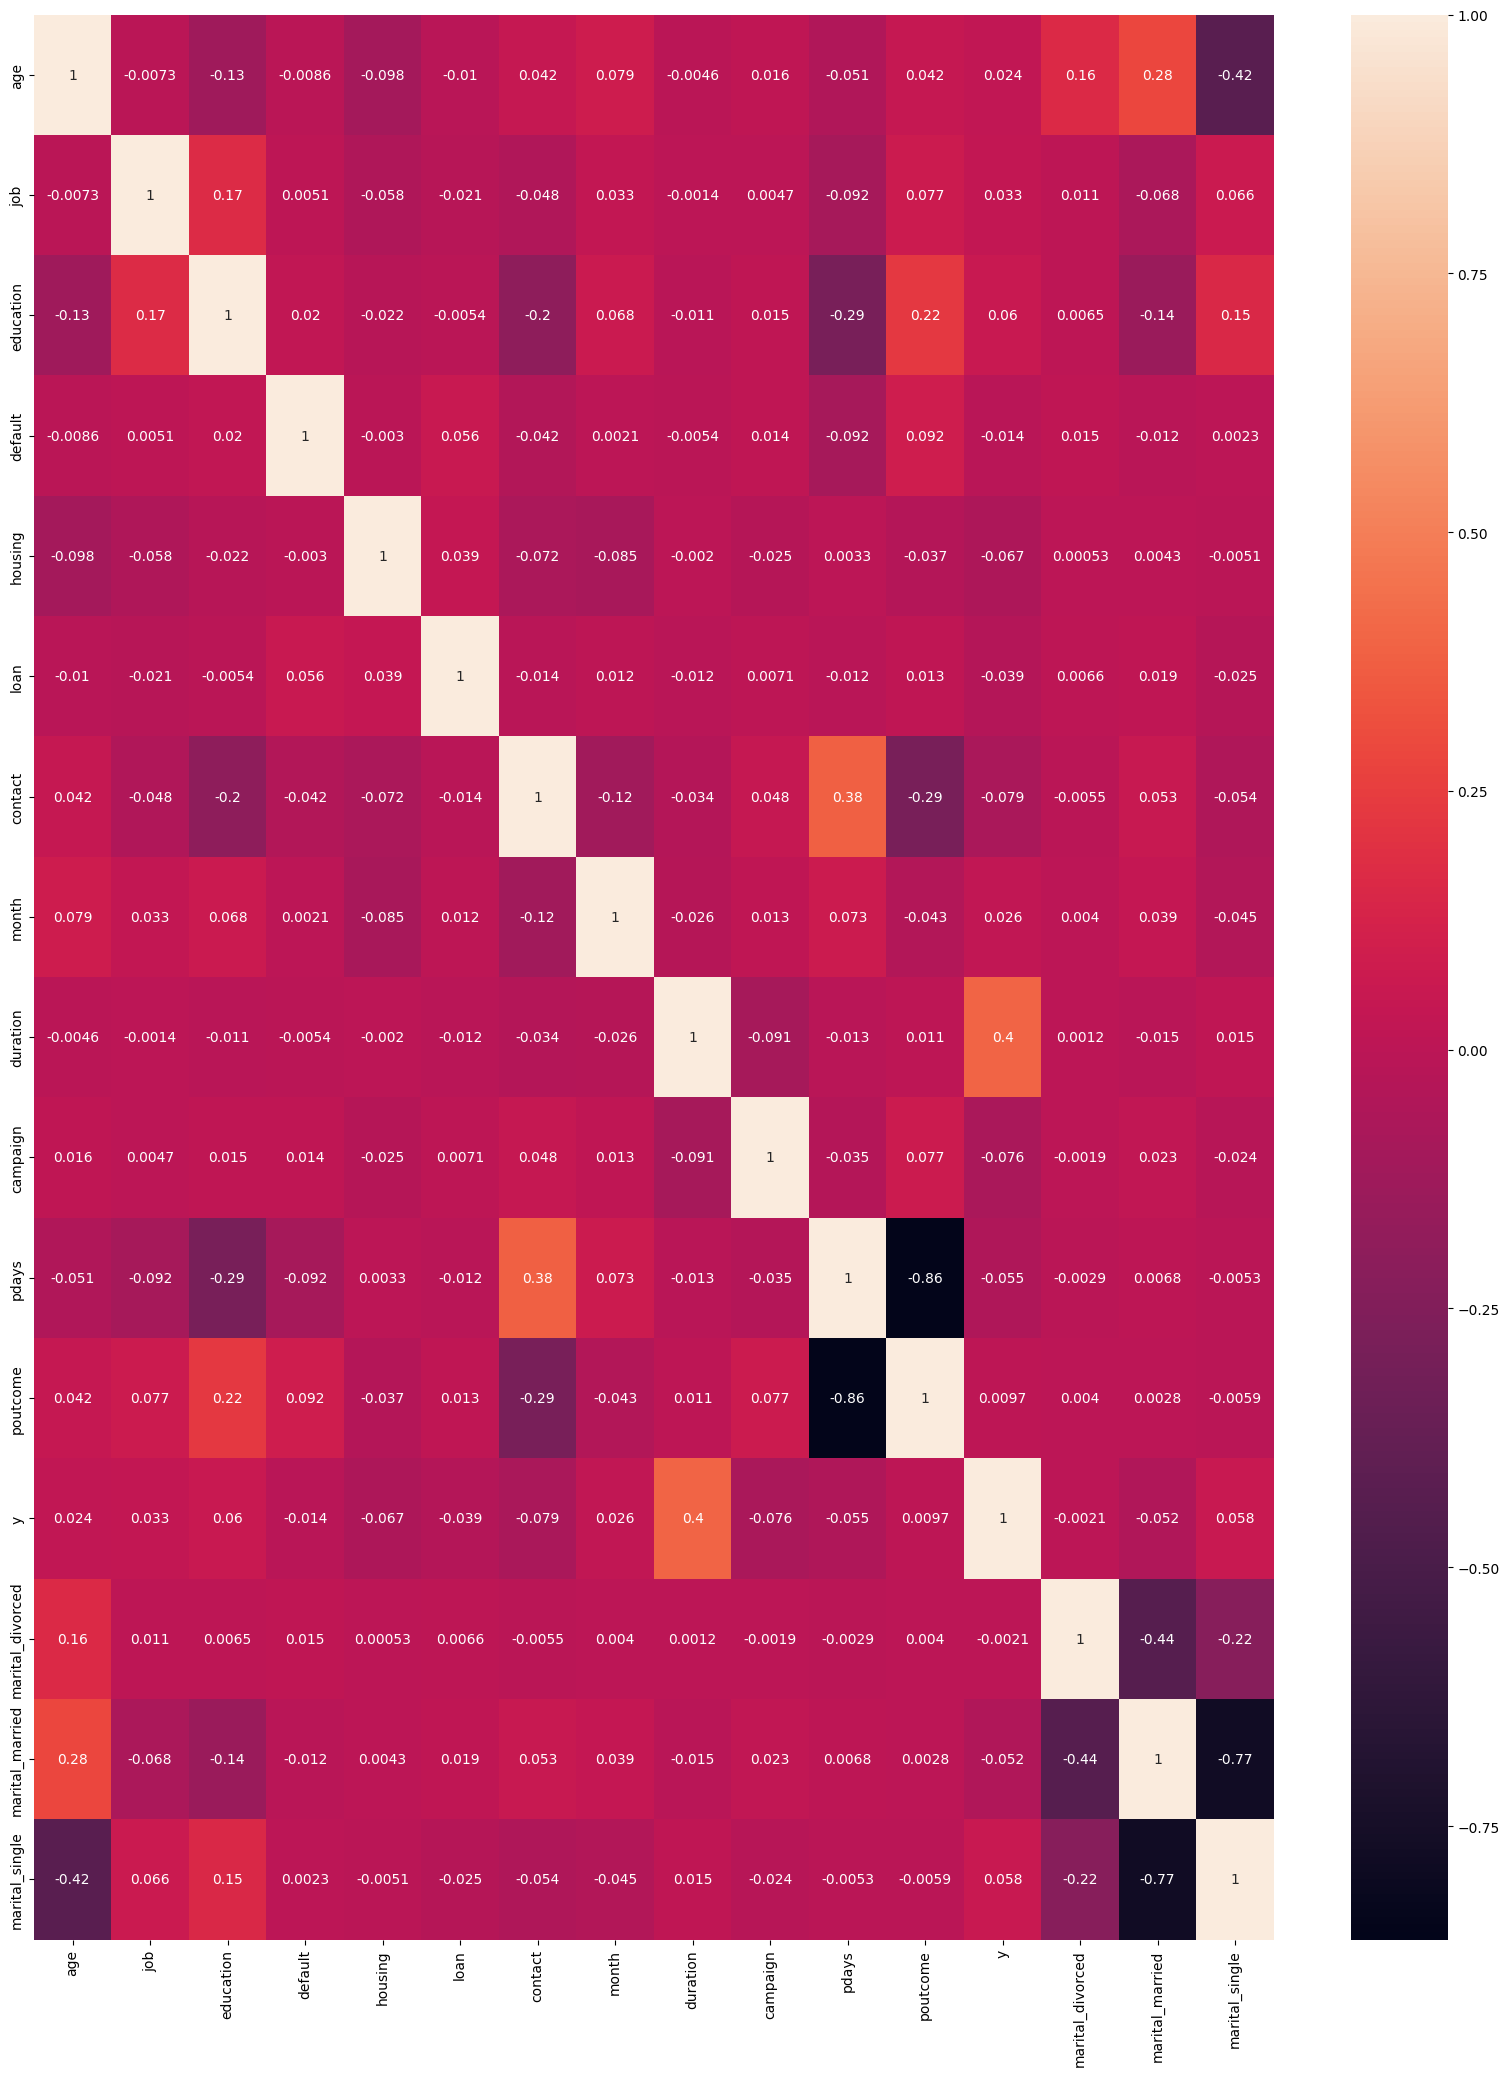

In [128]:
plt.figure(figsize=(20,25)) # define the plot size
sns.heatmap(data3.corr(),annot=True) # create heatmap for check corelation

## Model Creation

In [130]:
x = data3.drop("y",axis=1) # create independent variable
y = data3.y # create dependent variable

In [131]:
x

,age,job,education,default,housing,loan,contact,month,duration,campaign,pdays,poutcome,marital_divorced,marital_married,marital_single
0,58.0,4,9.0,0,1,0,0,4.0,261.0,1.0,-1,4,0,1,0
1,44.0,9,6.0,0,1,0,0,4.0,151.0,1.0,-1,4,0,0,1
2,33.0,2,6.0,0,1,1,0,4.0,76.0,1.0,-1,4,0,1,0
3,47.0,1,6.0,0,1,0,0,4.0,92.0,1.0,-1,4,0,1,0
4,33.0,11,6.0,0,0,0,0,4.0,198.0,1.0,-1,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95034,30.0,0,2.0,0,1,1,0,6.0,53.0,1.0,999,1,0,1,0
95035,39.0,0,5.0,0,1,0,1,6.0,219.0,1.0,999,1,0,1,0
95036,27.0,8,5.0,0,0,0,0,4.0,64.0,2.0,999,0,0,0,1
95037,58.0,0,5.0,0,0,0,0,7.0,528.0,1.0,999,1,0,1,0


In [132]:
y

0        0
1        0
2        0
3        0
4        0
        ..
95034    0
95035    0
95036    0
95037    0
95038    0
Name: y, Length: 95039, dtype: int64

### Scalling Technique

**Scaling:-**
* It is the process of transforming numerical features in a dataset so that they fall within a specific range or have a specific distribution. This is an essential preprocessing step for many machine learning algorithms, as it ensures that all features contribute equally to the model's learning process.

* There are two types of Scalling
    1. MinMax Scalling
    2. Standard Scalling

In [145]:
from sklearn.preprocessing import StandardScaler # import Standard Scaller
SE = StandardScaler() # call the Standard Scaller
df = SE.fit_transform(x) # transform the data
df

array([[ 1.69741668, -0.01575264,  1.39199215, ..., -0.35792863,
         0.80729912, -0.62517339],
       [ 0.34253942,  1.4363472 ,  0.00957597, ..., -0.35792863,
        -1.23869824,  1.59955623],
       [-0.722007  , -0.59659257,  0.00957597, ..., -0.35792863,
         0.80729912, -0.62517339],
       ...,
       [-1.30266869,  1.14592723, -0.45122942, ..., -0.35792863,
        -1.23869824,  1.59955623],
       [ 1.69741668, -1.1774325 , -0.45122942, ..., -0.35792863,
         0.80729912, -0.62517339],
       [-0.62523006, -0.01575264, -0.45122942, ..., -0.35792863,
        -1.23869824,  1.59955623]])

In [146]:
x.columns # check the columns

Index(['age', 'job', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'poutcome',
       'marital_divorced', 'marital_married', 'marital_single'],
      dtype='object')

In [148]:
x1 = pd.DataFrame(df,columns=['age', 'job', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'duration', 'campaign', 'pdays', 'poutcome',
       'marital_divorced', 'marital_married', 'marital_single']) # create a all transform value convert to dataframe
x1

,age,job,education,default,housing,loan,contact,month,duration,campaign,pdays,poutcome,marital_divorced,marital_married,marital_single
0,1.697417,-0.015753,1.391992,-0.097502,0.899478,-0.430300,-0.511650,-0.608411,0.146007,-0.847294,-0.993625,1.094882,-0.357929,0.807299,-0.625173
1,0.342539,1.436347,0.009576,-0.097502,0.899478,-0.430300,-0.511650,-0.608411,-0.475164,-0.847294,-0.993625,1.094882,-0.357929,-1.238698,1.599556
2,-0.722007,-0.596593,0.009576,-0.097502,0.899478,2.323961,-0.511650,-0.608411,-0.898690,-0.847294,-0.993625,1.094882,-0.357929,0.807299,-0.625173
3,0.632870,-0.887013,0.009576,-0.097502,0.899478,-0.430300,-0.511650,-0.608411,-0.808338,-0.847294,-0.993625,1.094882,-0.357929,0.807299,-0.625173
4,-0.722007,2.017187,0.009576,-0.097502,-1.111756,-0.430300,-0.511650,-0.608411,-0.209755,-0.847294,-0.993625,1.094882,-0.357929,-1.238698,1.599556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95034,-1.012338,-1.177433,-1.833646,-0.097502,0.899478,2.323961,-0.511650,0.279585,-1.028571,-0.847294,1.073169,-0.798488,-0.357929,0.807299,-0.625173
95035,-0.141345,-1.177433,-0.451229,-0.097502,0.899478,-0.430300,1.954459,0.279585,-0.091167,-0.847294,1.073169,-0.798488,-0.357929,0.807299,-0.625173
95036,-1.302669,1.145927,-0.451229,-0.097502,-1.111756,-0.430300,-0.511650,-0.608411,-0.966454,-0.213760,1.073169,-1.429612,-0.357929,-1.238698,1.599556
95037,1.697417,-1.177433,-0.451229,-0.097502,-1.111756,-0.430300,-0.511650,0.723583,1.653759,-0.847294,1.073169,-0.798488,-0.357929,0.807299,-0.625173


In [160]:
from sklearn.model_selection import train_test_split # import the train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0) # create traing and testing data

In [161]:
x_train

,age,job,education,default,housing,loan,contact,month,duration,campaign,pdays,poutcome,marital_divorced,marital_married,marital_single
79270,42.0,4,8.0,0,0,1,0,3.0,144.0,1.0,999,1,0,0,1
30866,35.0,9,6.0,0,0,0,0,1.0,29.0,2.0,-1,4,0,0,1
32658,44.0,2,6.0,0,1,0,0,3.0,519.0,1.0,14,0,0,1,0
36062,44.0,1,6.0,0,1,1,0,4.0,528.0,1.0,-1,4,0,1,0
11766,43.0,1,6.0,1,0,0,0,5.0,188.0,1.0,-1,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,35.0,4,9.0,0,1,0,0,7.0,233.0,6.0,-1,4,0,1,0
45891,28.0,0,6.0,0,0,0,0,8.0,184.0,1.0,-1,4,0,0,1
42613,35.0,4,9.0,0,0,0,0,0.0,261.0,2.0,-1,4,0,1,0
43567,70.0,5,6.0,0,0,0,0,3.0,149.0,2.0,182,0,0,1,0


In [162]:
x_test

,age,job,education,default,housing,loan,contact,month,duration,campaign,pdays,poutcome,marital_divorced,marital_married,marital_single
70478,57.0,1,3.0,0,1,0,0,7.0,122.0,1.0,999,1,0,1,0
65683,39.0,4,8.0,0,1,0,0,6.0,643.0,3.0,999,1,0,1,0
40569,72.0,4,9.0,0,0,0,0,6.0,169.0,2.0,-1,4,0,1,0
278,38.0,7,6.0,0,1,0,0,4.0,75.0,2.0,-1,4,0,0,1
76300,45.0,10,3.0,0,1,0,0,10.0,454.0,5.0,999,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75536,35.0,6,8.0,0,1,0,0,10.0,414.0,3.0,999,1,0,0,1
88012,44.0,1,7.0,0,0,0,0,9.0,123.0,2.0,999,1,0,0,1
6279,21.0,0,6.0,0,1,0,0,4.0,125.0,1.0,-1,4,0,0,1
83205,29.0,0,5.0,0,0,0,0,4.0,278.0,2.0,999,0,0,1,0


### SMOTE Technique

**SMOTE (Synthetic Minority Over-sampling Technique):-** 
* It is an oversampling technique used to address class imbalance in machine learning datasets. It works by generating synthetic examples for the minority class, thereby balancing the dataset without simply duplicating the existing data points. SMOTE is particularly useful when the dataset has a disproportionate number of observations in the target classes, where the minority class is underrepresented.

In [163]:
from imblearn.over_sampling import SMOTE # import SMOTE
sm = SMOTE() # call the SMOTE
x_train_smote,y_train_smote = sm.fit_resample(x_train,y_train) # transform the data

In [164]:
from collections import Counter # import Counter

# Print class distribution before SMOTE
print("Before SMOTE:", Counter(y_train))

# Assuming y_train_smote is the SMOTE-transformed y_train
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 58941, 1: 7586})
After SMOTE: Counter({0: 58941, 1: 58941})


## Model Selection

### Logistic Regression Algorithm

In [165]:
from sklearn.linear_model import LogisticRegression # import the Logistic Regression
LR = LogisticRegression() # call the Logistic Regression
LR.fit(x_train_smote,y_train_smote) # train the data

LogisticRegression()

In [166]:
y_lr = LR.predict(x_test) # predict the test data

#### Import all Classification Metrics

In [167]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report

In [634]:
a1 = accuracy_score(y_test,y_lr) # check the testing accuracy
a1

0.7922278338945006

In [169]:
y_tlr = LR.predict(x_train) # predict the train data

In [648]:
t1 = accuracy_score(y_train,y_tlr) # check the traning accuracy
t1

0.7928059284200399

In [637]:
f1 = f1_score(y_test,y_lr) # check the f1 score
f1

0.44207948766245997

In [171]:
confusion_matrix(y_test,y_lr) # check the Possitve or Negative values

array([[20241,  4956],
       [  968,  2347]], dtype=int64)

In [172]:
print(classification_report(y_test,y_lr)) # check the model report

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     25197
           1       0.32      0.71      0.44      3315

    accuracy                           0.79     28512
   macro avg       0.64      0.76      0.66     28512
weighted avg       0.88      0.79      0.82     28512



### Cross Validation of Logistic Regression

**Cross-validation:-**
* It is a statistical technique used to assess the performance of a machine learning model and ensure its generalization to unseen data. It involves dividing the dataset into multiple subsets and training and testing the model on different subsets to evaluate its performance more reliably. Cross-validation helps mitigate overfitting and gives a more robust estimate of how well the model will perform on real-world data.

In [674]:
from sklearn.model_selection import cross_val_score
cvscore2 = cross_val_score(LR,x,y,cv=5,scoring="accuracy")
cv2  = cvscore2.mean()
cv2

0.8778921976778358

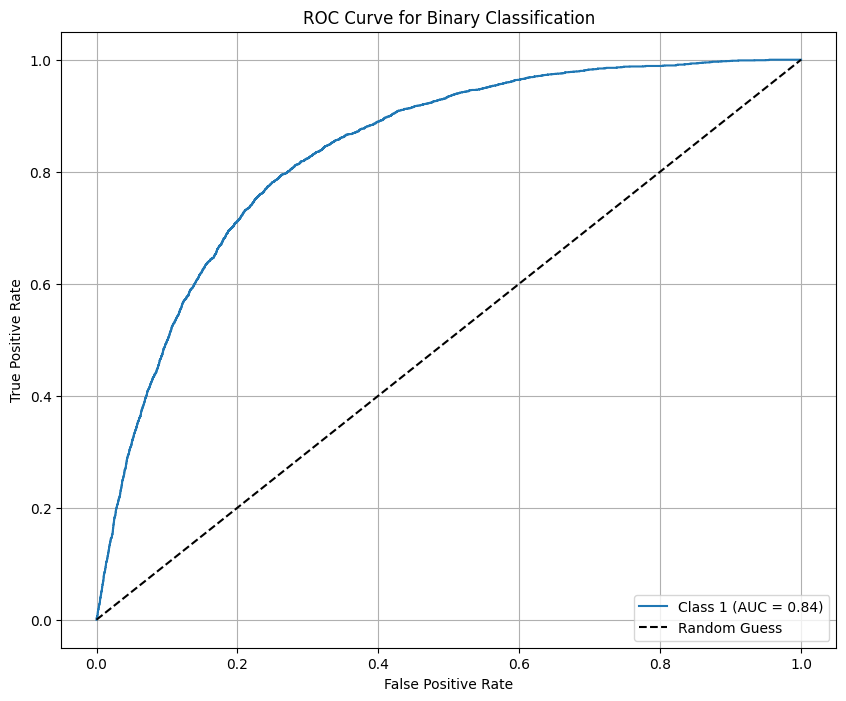

Predicted binary labels: [0 1 1 ... 0 0 0]


In [702]:
from sklearn.linear_model import LogisticRegression  # Import the Logistic Regression algorithm
from sklearn.metrics import roc_auc_score, roc_curve  # Import the AUC-ROC Curve
import matplotlib.pyplot as plt

# Initialize LogisticRegression for binary classification
lr = LogisticRegression()

# Train the model (assuming x_train_smote and y_train_smote are your training data)
lr.fit(x_train_smote, y_train_smote)

# Get predicted probabilities for class 1 (positive class) in binary classification
a21 = lr.predict_proba(x_test)  # Predicted probabilities (2D array)
# The predicted probabilities are in the second column for class 1 (positive class)
probs_class_1 = a21[:, 1]  # Extract probabilities for class 1

# Get the true labels (y_test)
# Assuming y_test contains binary labels (0 or 1)
fpr, tpr, _ = roc_curve(y_test, probs_class_1)  # ROC curve for class 1
auc_score = roc_auc_score(y_test, probs_class_1)  # AUC score for class 1

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {auc_score:.2f})')  # Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random guess

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Predicted binary labels based on 0.5 threshold
y_pred_binary = (probs_class_1 > 0.5).astype(int)
print("Predicted binary labels:", y_pred_binary)

## SVM:- Support Vectore Machine Algorithm

In [173]:
from sklearn.svm import SVC # import SVM model
svm = SVC() # call the Model
svm.fit(x_train_smote,y_train_smote) # train the data

SVC()

In [174]:
y_svm = svm.predict(x_test) # predict the test data

In [649]:
a2 = accuracy_score(y_test,y_svm) # check the testing accuracy
a2

0.7604166666666666

In [176]:
y_tsvm = svm.predict(x_train) # predict the train data

In [650]:
t2 = accuracy_score(y_train,y_tsvm) # check the trainig accuracy
t2

0.7576472710328137

In [638]:
f2 = f1_score(y_test,y_svm) # check the f1 score
f2

0.42271613284881265

In [635]:
confusion_matrix(y_test,y_svm) # check the Possitve or Negative values

array([[19180,  6017],
       [  814,  2501]], dtype=int64)

In [636]:
print(classification_report(y_test,y_svm)) # check the model report

              precision    recall  f1-score   support

           0       0.96      0.76      0.85     25197
           1       0.29      0.75      0.42      3315

    accuracy                           0.76     28512
   macro avg       0.63      0.76      0.64     28512
weighted avg       0.88      0.76      0.80     28512



### Cross Validation of SVM

**Cross-validation:-**
* It is a statistical technique used to assess the performance of a machine learning model and ensure its generalization to unseen data. It involves dividing the dataset into multiple subsets and training and testing the model on different subsets to evaluate its performance more reliably. Cross-validation helps mitigate overfitting and gives a more robust estimate of how well the model will perform on real-world data.

In [675]:
from sklearn.model_selection import cross_val_score
cvscore3 = cross_val_score(svm,x,y,cv=5,scoring="accuracy")
cv3  = cvscore3.mean()
cv3

0.8801226940313855

## Decision Tree Algorithm

In [298]:
from sklearn.tree import DecisionTreeClassifier # import DT model
DT = DecisionTreeClassifier(criterion="entropy",max_depth=15,min_samples_leaf=4,random_state=0) # call the DT Model
DT.fit(x_train_smote,y_train_smote) # train the data

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       random_state=0)

In [299]:
y_dt = DT.predict(x_test) # predict the test data

In [651]:
a3 = accuracy_score(y_test,y_dt) # check the testing accuracy
a3

0.8794542648709316

In [301]:
y_tdt = DT.predict(x_train) # predict the train data

In [652]:
t3 = accuracy_score(y_train,y_tdt) # check the trainig accuracy
t3

0.9184391299773025

In [639]:
f3 = f1_score(y_test,y_dt) # check the f1 score
f3

0.5228377065111759

In [183]:
confusion_matrix(y_test,y_dt) # check the Possitve or Negative values

array([[23343,  1854],
       [ 1489,  1826]], dtype=int64)

In [184]:
print(classification_report(y_test,y_dt)) # check the model report

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     25197
           1       0.50      0.55      0.52      3315

    accuracy                           0.88     28512
   macro avg       0.72      0.74      0.73     28512
weighted avg       0.89      0.88      0.89     28512



#### Hyperparamter of Desicion Tree

**Hyperparameter:-** 
* It is a parameter whose value is set before the learning process begins and is not learned from the data. Hyperparameters are typically used to control the learning process and the model's architecture. They can significantly influence the performance of a machine learning model and need to be chosen carefully, often through techniques like grid search or random search.

* There a two types of tuning:-
    1. GridSearchCV
    2. RandomizedSearchCV

In [307]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_split': [2,20],
    'min_samples_leaf': [1,10],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the model
grid_search.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 10],
                         'min_samples_split': [2, 20]},
             scoring='accuracy')

In [308]:
y_hdt = grid_search.predict(x_test) # predict the test data

In [309]:
accuracy_score(y_test,y_hdt) # check the testing accuracy

0.8152707631874299

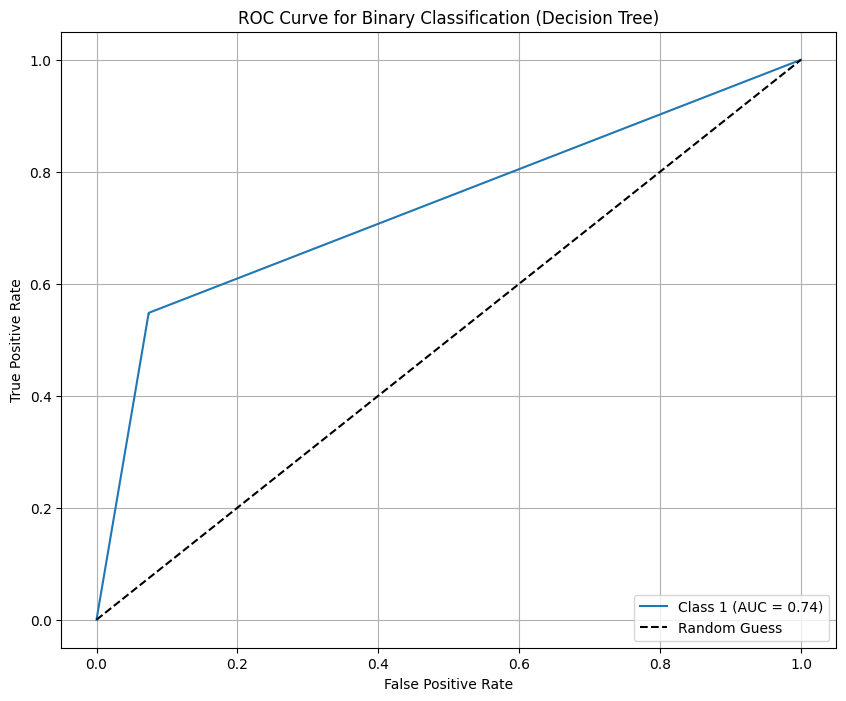

Predicted binary labels: [0 0 0 ... 0 0 0]


In [704]:
from sklearn.tree import DecisionTreeClassifier  # Import the Decision Tree Classifier
from sklearn.metrics import roc_auc_score, roc_curve  # Import the AUC-ROC Curve
import matplotlib.pyplot as plt

# Initialize DecisionTreeClassifier for binary classification
dt = DecisionTreeClassifier(random_state=0)

# Train the model (assuming x_train_smote and y_train_smote are your training data)
dt.fit(x_train_smote, y_train_smote)

# Get predicted probabilities for class 1 (positive class) in binary classification
a21 = dt.predict_proba(x_test)  # Predicted probabilities (2D array)
# The predicted probabilities are in the second column for class 1 (positive class)
probs_class_1 = a21[:, 1]  # Extract probabilities for class 1

# Get the true labels (y_test)
# Assuming y_test contains binary labels (0 or 1)
fpr, tpr, _ = roc_curve(y_test, probs_class_1)  # ROC curve for class 1
auc_score = roc_auc_score(y_test, probs_class_1)  # AUC score for class 1

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {auc_score:.2f})')  # Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random guess

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification (Decision Tree)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Predicted binary labels based on 0.5 threshold
y_pred_binary = (probs_class_1 > 0.5).astype(int)
print("Predicted binary labels:", y_pred_binary)

## KNN:- K Nearest Kneigbour

In [364]:
from sklearn.neighbors import KNeighborsClassifier # import the KNN model
KNN = KNeighborsClassifier(n_neighbors=12,algorithm="ball_tree") # call the knn model
KNN.fit(x_train_smote,y_train_smote) # train the data

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=12)

In [365]:
y_knn = KNN.predict(x_test) # predict the test data

In [653]:
a4 = accuracy_score(y_test,y_knn) # check the testing accuracy
a4

0.8001893939393939

In [367]:
y_tknn = KNN.predict(x_train) # predict the train data

In [654]:
t4 = accuracy_score(y_train,y_tknn) # check the traning accuracy
t4

0.8491740195710012

In [640]:
f4 = f1_score(y_test,y_knn) # check the f1 score
f4

0.45644499570651653

In [369]:
confusion_matrix(y_test,y_knn) # check the Possitve or Negative values

array([[20423,  4774],
       [  923,  2392]], dtype=int64)

In [370]:
print(classification_report(y_test,y_knn)) # check the model report

              precision    recall  f1-score   support

           0       0.96      0.81      0.88     25197
           1       0.33      0.72      0.46      3315

    accuracy                           0.80     28512
   macro avg       0.65      0.77      0.67     28512
weighted avg       0.88      0.80      0.83     28512



## Bagging Algorithm

In [441]:
from sklearn.ensemble import BaggingClassifier # import Bagging model
BG = BaggingClassifier(n_estimators=450,max_samples=0.2,max_features=0.2,random_state=7) # call the bagging model
BG.fit(x_train_smote,y_train_smote) # train the data

BaggingClassifier(max_features=0.2, max_samples=0.2, n_estimators=450,
                  random_state=7)

In [442]:
y_bg = BG.predict(x_test) # predict the test data

In [655]:
a5 = accuracy_score(y_test,y_bg) # check the testing accuracy
a5

0.8965698653198653

In [444]:
y_tbg = BG.predict(x_train) # predict the train data

In [656]:
t5 = accuracy_score(y_train,y_tbg) # check the traning accuracy
t5

0.9058728035233815

In [641]:
f5 = f1_score(y_test,y_bg) # check the f1 score
f5

0.280205028069319

In [198]:
confusion_matrix(y_test,y_bg) # check the Possitve or Negative values

array([[24007,  1190],
       [ 1590,  1725]], dtype=int64)

In [199]:
print(classification_report(y_test,y_bg)) # check the model report

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     25197
           1       0.59      0.52      0.55      3315

    accuracy                           0.90     28512
   macro avg       0.76      0.74      0.75     28512
weighted avg       0.90      0.90      0.90     28512



## Random Forest Algorithm

In [501]:
from sklearn.ensemble import RandomForestClassifier # improt RM model
RM = RandomForestClassifier(n_estimators=300,max_depth=15,max_features="log2",random_state=10) # call the RM model
RM.fit(x_train_smote,y_train_smote) # train the data

RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=300,
                       random_state=10)

In [502]:
y_rm = RM.predict(x_test) # predict the test data

In [657]:
a6 = accuracy_score(y_test,y_rm) # check the testing accuracy
a6

0.8925014029180696

In [504]:
y_trm = RM.predict(x_train) # predict the train data

In [658]:
t6 = accuracy_score(y_train,y_trm) # check the traning accuracy
t6

0.9425496414989403

In [642]:
f6 = f1_score(y_test,y_rm) # check the f1 score
f6

0.5799643689187337

In [506]:
confusion_matrix(y_test,y_rm) # check the Possitve or Negative values

array([[23331,  1866],
       [ 1199,  2116]], dtype=int64)

In [507]:
print(classification_report(y_test,y_rm)) # check the model report

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     25197
           1       0.53      0.64      0.58      3315

    accuracy                           0.89     28512
   macro avg       0.74      0.78      0.76     28512
weighted avg       0.90      0.89      0.90     28512



## Gradiant Boosting Algorithm

In [514]:
from sklearn.ensemble import GradientBoostingClassifier # import GB Model
GB = GradientBoostingClassifier(loss="exponential",learning_rate=0.2,n_estimators=300) # call the GB model
GB.fit(x_train_smote,y_train_smote) # train the data

GradientBoostingClassifier(learning_rate=0.2, loss='exponential',
                           n_estimators=300)

In [515]:
y_gb = GB.predict(x_test) # predict the test data

In [659]:
a7 = accuracy_score(y_test,y_gb) # check the testing accuracy
a7

0.8975519079685746

In [517]:
y_tgb = GB.predict(x_train) # predict the train data

In [660]:
t7 = accuracy_score(y_train,y_tgb) # check the traning accuracy
t7

0.9062485907977212

In [643]:
f7 = f1_score(y_test,y_gb) # check the f1 score
f7

0.5560115519075848

In [519]:
confusion_matrix(y_test,y_gb) # check the Possitve or Negative values

array([[23762,  1435],
       [ 1486,  1829]], dtype=int64)

In [520]:
print(classification_report(y_test,y_gb)) # check the model report

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     25197
           1       0.56      0.55      0.56      3315

    accuracy                           0.90     28512
   macro avg       0.75      0.75      0.75     28512
weighted avg       0.90      0.90      0.90     28512



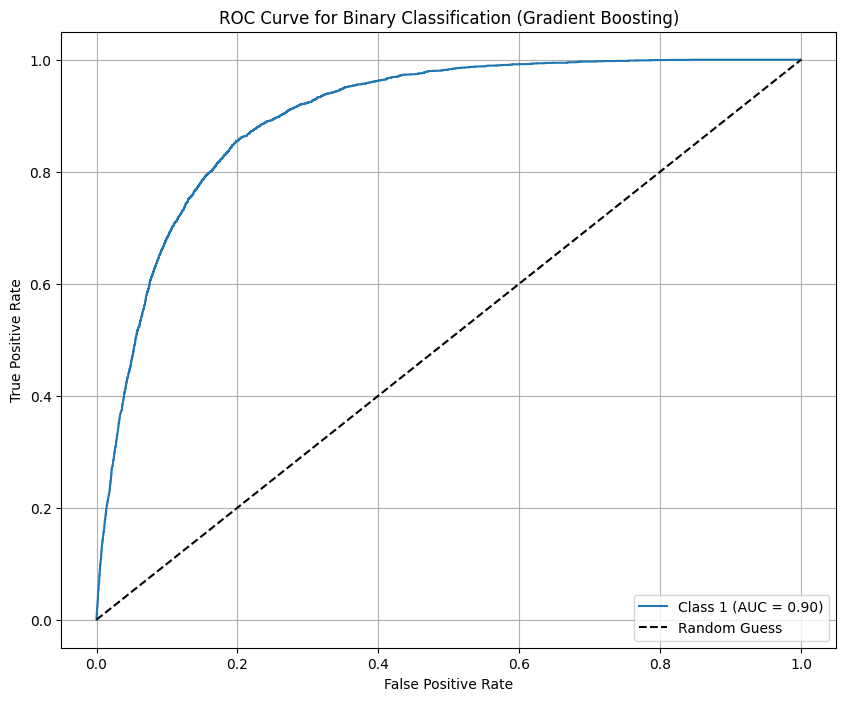

Predicted binary labels: [0 1 0 ... 0 0 0]


In [705]:
from sklearn.ensemble import GradientBoostingClassifier  # Import Gradient Boosting Classifier
from sklearn.metrics import roc_auc_score, roc_curve  # Import the AUC-ROC Curve
import matplotlib.pyplot as plt

# Initialize GradientBoostingClassifier for binary classification
gb = GradientBoostingClassifier(random_state=42)

# Train the model (assuming x_train_smote and y_train_smote are your training data)
gb.fit(x_train_smote, y_train_smote)

# Get predicted probabilities for class 1 (positive class) in binary classification
a21 = gb.predict_proba(x_test)  # Predicted probabilities (2D array)
# The predicted probabilities are in the second column for class 1 (positive class)
probs_class_1 = a21[:, 1]  # Extract probabilities for class 1

# Get the true labels (y_test)
# Assuming y_test contains binary labels (0 or 1)
fpr, tpr, _ = roc_curve(y_test, probs_class_1)  # ROC curve for class 1
auc_score = roc_auc_score(y_test, probs_class_1)  # AUC score for class 1

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {auc_score:.2f})')  # Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random guess

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification (Gradient Boosting)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Predicted binary labels based on 0.5 threshold
y_pred_binary = (probs_class_1 > 0.5).astype(int)
print("Predicted binary labels:", y_pred_binary)

## XGBoot Algorithm

In [554]:
from xgboost import XGBClassifier # import XGB model
XGB = XGBClassifier(n_estimators=400,learning_rate =0.1,gamma =0.2,min_child_weight =3) # call the XGB model
XGB.fit(x_train_smote,y_train_smote) # train the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [555]:
y_xgb = XGB.predict(x_test) # predict the test data

In [661]:
a8 = accuracy_score(y_test,y_xgb) # check the testing accuracy
a8

0.9043560606060606

In [557]:
y_txgb = XGB.predict(x_train) # predict the train data

In [662]:
t8 = accuracy_score(y_train,y_txgb) # check the traning accuracy
t8

0.925999969937018

In [644]:
f8 = f1_score(y_test,y_xgb) # check the f1 score
f8

0.5756962813132099

In [559]:
confusion_matrix(y_test,y_xgb) # check the Possitve or Negative values

array([[23935,  1262],
       [ 1465,  1850]], dtype=int64)

In [560]:
print(classification_report(y_test,y_xgb)) # check the model report

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     25197
           1       0.59      0.56      0.58      3315

    accuracy                           0.90     28512
   macro avg       0.77      0.75      0.76     28512
weighted avg       0.90      0.90      0.90     28512



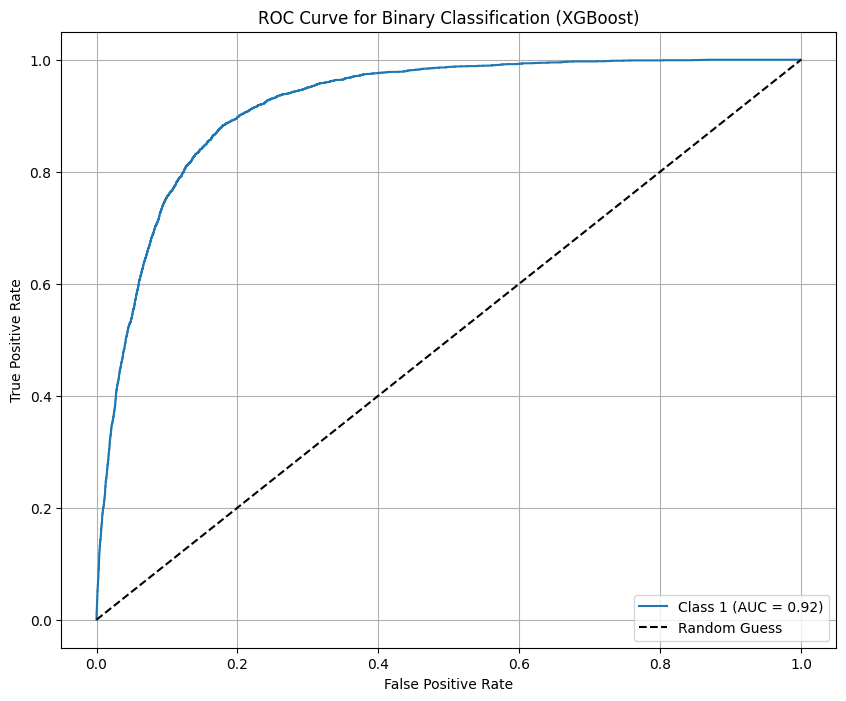

Predicted binary labels: [0 1 0 ... 0 0 0]


In [707]:
import xgboost as xgb  # Import XGBoost Classifier
from sklearn.metrics import roc_auc_score, roc_curve  # Import the AUC-ROC Curve
import matplotlib.pyplot as plt

# Initialize XGBClassifier for binary classification
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model (assuming x_train_smote and y_train_smote are your training data)
xgb_model.fit(x_train_smote, y_train_smote)

# Get predicted probabilities for class 1 (positive class) in binary classification
a21 = xgb_model.predict_proba(x_test)  # Predicted probabilities (2D array)
# The predicted probabilities are in the second column for class 1 (positive class)
probs_class_1 = a21[:, 1]  # Extract probabilities for class 1

# Get the true labels (y_test)
# Assuming y_test contains binary labels (0 or 1)
fpr, tpr, _ = roc_curve(y_test, probs_class_1)  # ROC curve for class 1
auc_score = roc_auc_score(y_test, probs_class_1)  # AUC score for class 1

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {auc_score:.2f})')  # Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line for random guess

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification (XGBoost)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Predicted binary labels based on 0.5 threshold
y_pred_binary = (probs_class_1 > 0.5).astype(int)
print("Predicted binary labels:", y_pred_binary)

## Barnoli Navin Baise Algorithm

In [569]:
from sklearn.naive_bayes import BernoulliNB # import NV model
BN = BernoulliNB(alpha=3,binarize=0.3) # call the NV model
BN.fit(x_train_smote,y_train_smote) # train the data

BernoulliNB(alpha=3, binarize=0.3)

In [570]:
y_bn = BN.predict(x_test) # predict the test data

In [663]:
a9 = accuracy_score(y_test,y_bn) # check the testing accuracy
a9

0.6668420314253648

In [572]:
y_tbn = BN.predict(x_train) # predict the train data

In [664]:
t9 = accuracy_score(y_train,y_tbn) # check the traning accuracy
t9

0.6661806484585207

In [645]:
f9 = f1_score(y_test,y_bn) # check the f1 score
f9

0.25339935549791714

In [227]:
confusion_matrix(y_test,y_bn) # check the Possitve or Negative values

array([[17415,  7782],
       [ 1710,  1605]], dtype=int64)

In [228]:
print(classification_report(y_test,y_bn)) # check the model report

              precision    recall  f1-score   support

           0       0.91      0.69      0.79     25197
           1       0.17      0.48      0.25      3315

    accuracy                           0.67     28512
   macro avg       0.54      0.59      0.52     28512
weighted avg       0.82      0.67      0.72     28512



### Cross Validation of Navin Base

**Cross-validation:-**
* It is a statistical technique used to assess the performance of a machine learning model and ensure its generalization to unseen data. It involves dividing the dataset into multiple subsets and training and testing the model on different subsets to evaluate its performance more reliably. Cross-validation helps mitigate overfitting and gives a more robust estimate of how well the model will perform on real-world data.

In [673]:
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(BN,x,y,cv=5,scoring="accuracy")
cv1  = cvscore.mean()
cv1

0.885278674244417

## AdaBoosting Algorithm

In [584]:
from sklearn.ensemble import AdaBoostClassifier # import ADD model
AD = AdaBoostClassifier(n_estimators=300,learning_rate=0.3,random_state=0) # call the ADD model
AD.fit(x_train_smote,y_train_smote) # train the data

AdaBoostClassifier(learning_rate=0.3, n_estimators=300, random_state=0)

In [585]:
y_ad = AD.predict(x_test) # predict the test data

In [665]:
a10 = accuracy_score(y_test,y_ad) # check the testing accuracy
a10

0.882260101010101

In [587]:
y_tad = AD.predict(x_train) # predict the train data

In [667]:
t10 = accuracy_score(y_train,y_tad) # check the traning accuracy
t10

0.8823635516406872

In [646]:
f10 = f1_score(y_test,y_ad) # check the f1 score
f10

0.5478787878787879

In [589]:
confusion_matrix(y_test,y_ad) # check the Possitve or Negative values

array([[23121,  2076],
       [ 1281,  2034]], dtype=int64)

In [590]:
print(classification_report(y_test,y_ad)) # check the model report

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     25197
           1       0.49      0.61      0.55      3315

    accuracy                           0.88     28512
   macro avg       0.72      0.77      0.74     28512
weighted avg       0.89      0.88      0.89     28512



## ANN:- Artificial Neural Network

In [626]:
from sklearn.neural_network import MLPClassifier # improt ANN model
ANN = MLPClassifier(hidden_layer_sizes = (300,200),activation="logistic",learning_rate="adaptive",solver="sgd",batch_size=40) # call the ANN model
ANN.fit(x_train_smote,y_train_smote) # train the data

MLPClassifier(activation='logistic', batch_size=40,
              hidden_layer_sizes=(300, 200), learning_rate='adaptive',
              solver='sgd')

In [627]:
y_ann = ANN.predict(x_test) # predict the test data

In [668]:
a11 = accuracy_score(y_test,y_ann) # check the testing accuracy
a11

0.8131663860830527

In [629]:
y_tann = ANN.predict(x_train) # predict the train data

In [669]:
t11 = accuracy_score(y_train,y_tann) # check the traning accuracy
t11

0.8155936687360019

In [647]:
f11= f1_score(y_test,y_ann) # check the f1 score
f11

0.48376780695803856

In [631]:
confusion_matrix(y_test,y_ann) # check the Possitve or Negative values

array([[20689,  4508],
       [  819,  2496]], dtype=int64)

In [632]:
print(classification_report(y_test,y_ann)) # check the model report

              precision    recall  f1-score   support

           0       0.96      0.82      0.89     25197
           1       0.36      0.75      0.48      3315

    accuracy                           0.81     28512
   macro avg       0.66      0.79      0.68     28512
weighted avg       0.89      0.81      0.84     28512



## Model Comarision Reprot

In [680]:
# check the all algorithm model perforamnce in table form
# check the Model name, r2_score, mean_squer_error, mean_absolute_error
score1 = pd.DataFrame({"Model":["LogisticRegression","SVM Algorithm","DecisionTreeClassifier","KNN Algorithm","Bagging Algorithm","RandomForestClassifier","GradiantBoosting Algorithm","XGBClassifirer Algorithm","NavinBaise Algorithm","Adda Boosting Algorithm","ANN_MLPClassifer Algorithm"],
                      "Accuracy_Score":[a1*100,a2*100,a3*100,a4*100,a5*100,a6*100,a7*100,a8*100,a3*100,a10*100,a11*100],
                       "Traning_Accuracy_Score":[t1*100,t2*100,t3*100,t4*100,t5*100,t6*100,t7*100,t8*100,t9*100,a10*100,a11*100],
                      "f1_score":[f1*100,f2*100,f3*100,f4*100,f5*100,f6*100,f7*100,f8*100,f9*100,f10*100,f11*100],
                      "Cross_Validation_Score":[cv2*100,cv3*100,None,None,None,None,None,None,cv1*100,None,None]})
score1

,Model,Accuracy_Score,Traning_Accuracy_Score,f1_score,Cross_Validation_Score
0,LogisticRegression,79.222783,79.280593,44.207949,87.789220
1,SVM Algorithm,76.041667,75.764727,42.271613,88.012269
2,DecisionTreeClassifier,87.945426,91.843913,52.283771,NaN
3,KNN Algorithm,80.018939,84.917402,45.644500,NaN
4,Bagging Algorithm,89.656987,90.587280,28.020503,NaN
5,RandomForestClassifier,89.250140,94.254964,57.996437,NaN
6,GradiantBoosting Algorithm,89.755191,90.624859,55.601155,NaN
7,XGBClassifirer Algorithm,90.435606,92.599997,57.569628,NaN
8,NavinBaise Algorithm,87.945426,66.618065,25.339936,88.527867
9,Adda Boosting Algorithm,88.226010,88.226010,54.787879,NaN


**Model Comparison Report**
* Here we are total 11 Algorithm use with all algorithm hyperparamter use. Highest Performace of XGBClaasifirer Algorithm **testing accuracy is 90.43** and **traning accuracy is 92.59** or one things is all algorithm is generalize a model.
* Here other alorithm is nearest of XGBClassifirer like Adda Boosting, Gradiant Boosting, Random Forest Algortihm, Bagging or Decision Tree.
* low acuracy in Logistic regression, SVM, Navin Baise to use Cross validation Technique and improve the score or overfiting problem reduce.

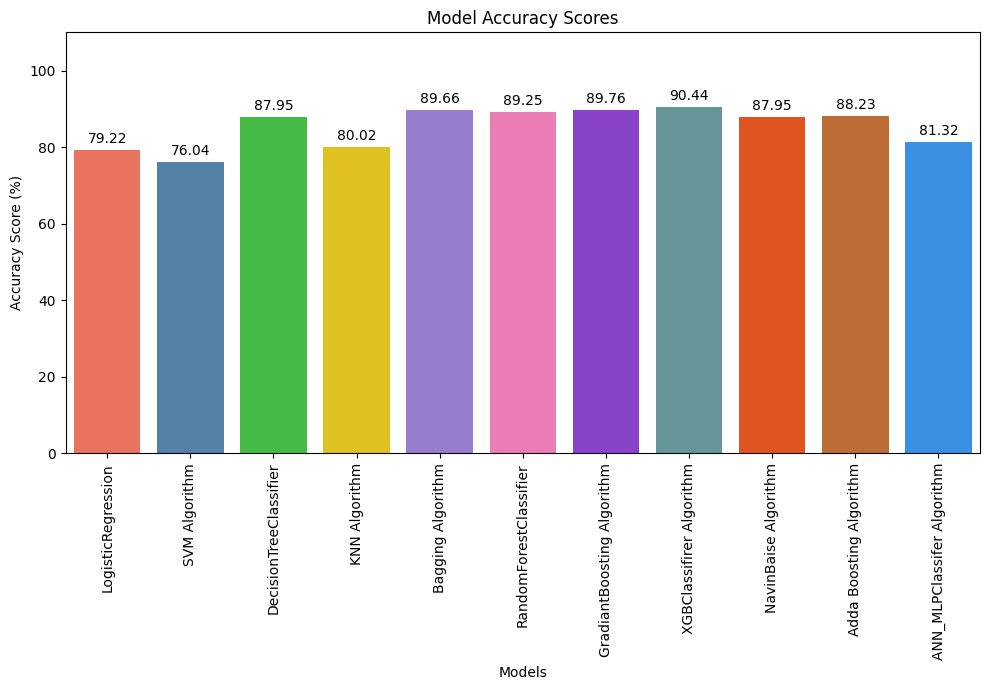

In [681]:
# Plotting the Accuracy Scores
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500', '#D2691E', '#1E90FF']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 7))
bars = sns.barplot(x='Model', y='Accuracy_Score', data=score1, palette=colors)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('Model Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility

# Show the plot
plt.tight_layout()
plt.show()

## Model Save

In [682]:
import pickle # import Pickle
with open("Portges.csv","wb") as f: # save the model in file
    pickle.dump(XGB,f)

In [683]:
with open("Portges.csv","rb") as f: # load the save model
    file = pickle.load(f)

In [684]:
file

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [699]:
x_train_smote.tail() # Show last 5 rows

,age,job,education,default,housing,loan,contact,month,duration,campaign,pdays,poutcome,marital_divorced,marital_married,marital_single
117877,59.000000,9,5.942916,0,0,0,0,1.942916,301.228337,1.000000,89,3,0,1,0
117878,22.607551,8,7.205664,0,0,0,0,2.009439,167.392449,1.598112,-1,4,0,0,1
117879,40.229732,0,8.000000,0,0,0,0,10.000000,643.000000,1.000000,999,1,0,1,0
117880,49.524497,5,6.000000,0,0,0,0,9.000000,109.039195,1.000000,-1,4,0,1,0
117881,35.650151,9,8.000000,0,1,0,0,3.349849,195.000000,1.000000,999,1,0,1,0


In [698]:
y_train_smote.tail()  # Show last 5 rows

117877    1
117878    1
117879    1
117880    1
117881    1
Name: y, dtype: int64

In [697]:
# Predict the Data
file.predict([[51.367858,	4,	8.000000,	0,	0,	0,	0,	8.103574,	643.000000,	2.367858,	999,	1,	0,	1,	0]])

array([1])

## Report on Challenges faced

**Large Volume of Data:-**
* Handling large datasets can be computationally expensive and time-consuming for training machine learning models.

**Unstructured or Poorly Formatted Data:-**
* Data inconsistencies like mixed formats, missing headers, and irregular column values can hinder analysis.

**Missing or Null Values:-**
* Null values in critical columns can lead to biased or incomplete models.

**Incorrect Data Types:-**
* Features might have incorrect data types (e.g., numeric columns stored as strings), causing processing errors.

**Imbalanced Classes:-**
* Imbalanced target classes (e.g., "yes" vs. "no") lead to models biased towards the majority class.

**Outliers:-**
* Outliers in numerical columns (e.g., extremely high balances or durations) can distort model performance.

**Scaling and Transformation:-**
* Standardlization numerical features and encoded categorical data.m